In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import models
from tabulate import tabulate

sns.set(style="whitegrid")

# Problem Set 5

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Introduction

Labs 9 and 10 were all about linear models, specifically linear and logistic regression. We learned how to build and interpret multivariate models by using domain knowledge, comparing the predicted and actual values of the coefficients and the credible intervals, and looking at residuals. We also applied transformations to make the models perform better and increase interpretability.

Using the techniques covered during Modules 9 and 10 (lectures, labs, course notes), **build, describe, and use** a linear regression model that estimates the target variable `mpg` for the accompanying auto data set. You may use other techniques you know but you must at least use the techniques described in class and call out and describe anything "extra" that you do and why.

Do **not** use any feature selection techniques or anything other than linear regression. Follow the method described in class.

The instructions say build, **describe, and use**. You must describe all aspects of your final model (all the parameters and metrics) and use it to predict one value as described in the course notes.

## Table of Contents

* [1.1 - ETL](#ETL)
* [1.2 - EDA](#EDA)
    * [1.2.1 Single Variable EDA](#Single-Variable-EDA)
       * [1.2.1.1 Mpg](#Mpg)
       * [1.2.1.2 Cylinders](#Cylinders)
       * [1.2.1.3 Displacement](#Displacement)
       * [1.2.1.4 Horsepower](#Horsepower)
       * [1.2.1.5 Weight](#Weight)
       * [1.2.1.6 Acceleration](#Acceleration)
       * [1.2.1.7 Model Year](#Model-Year)
       * [1.2.1.8 Origin](#Origin)
       * [1.2.1.9 Car Name](#Car-Name)
    * [1.2.2 Pairwise EDA](#Pairwise-EDA)
       * [1.2.2.1 Displacement and Weight](#Displacement-And-Weight)
       * [1.2.2.2 Displacement and Horsepower](#Displacement-And-Horsepower)
       * [1.2.2.3 Displacement and Cylinders](#Displacement-And-Cylinders)
       * [1.2.2.4 Weight and Horsepower](#Weight-And-Horsepower)
       * [1.2.2.5 Weight and Model Year](#Weight-And-Model-Year)
       * [1.2.2.6 Displacement and Model Year](#Displacement-And-Model-Year)
       * [1.2.2.7 Horsepower and Acceleration](#Horsepower-And-Acceleration)
       * [1.2.2.8 Cylinders and Origin](#Cylinders-And-Origin)
       * [1.2.2.9 Cylinders and Mpg](#Cylinders-And-Mpg)
       * [1.2.2.10 Displacement and Mpg](#Displacement-And-Mpg)
       * [1.2.2.11 Horsepower and Mpg](#Horsepower-And-Mpg)
       * [1.2.2.12 Weight and Mpg](#Weight-And-Mpg)
       * [1.2.2.13 Acceleration and Mpg](#Acceleration-And-Mpg)
       * [1.2.2.14 Model Year and Mpg](#Model-Year-And-Mpg)
       * [1.2.2.15 Origin and Mpg](#Origin-And-Mpg)
       * [1.2.2.16 Car Name and Mpg](#Car-Name-And-Mpg)
* [1.3 - Build The model](#Build)
    * [1.3.1 The Null Model](#Null)
    * [1.3.2 The All-in Model](#All-in)
    * [1.3.3 Multicollinearity](#Multi)
    * [1.3.4 Residuals](#Residuals)
    * [1.3.5 Transformations](#Transforms)
    * [1.3.6 Model Trimming](#Trim)
    * [1.3.7 Interaction Terms](#Interaction)
    * [1.3.8 Final Model](#Final)
* [1.4 - Describe the model](#Describe)
    * [1.4.1 Model Summary](#Summary)
    * [1.4.2 Model Coefficients](#coeff)
        * [1.4.2.1 $\beta_0$ The Intercept](#B0)
        * [1.4.2.2 $\beta_1$ Log Horsepower Scaled](#B1)
        * [1.4.2.3 $\beta_2$ Log Weight Scaled](#B2)
        * [1.4.2.4 $\beta_3$ 3 Cylinder](#B3)
        * [1.4.2.5 $\beta_4$ 6 Cylinder](#B4)
        * [1.4.2.6 $\beta_5$ Model Year 72](#B5)
        * [1.4.2.7 $\beta_6$ Model Year 73](#B6)
        * [1.4.2.8 $\beta_7$ Model Year 75](#B7)
        * [1.4.2.9 $\beta_8$ Model Year 76](#B8)
        * [1.4.2.10 $\beta_9$ Model Year 77](#B9)
        * [1.4.2.11 $\beta_{10}$ Model Year 78](#B10)
        * [1.4.2.12 $\beta_{11}$ Model Year 79](#B11)
        * [1.4.2.13 $\beta_{12}$ Model Year 80](#B12)
        * [1.4.2.14 $\beta_{13}$ Model Year 81](#B13)
        * [1.4.2.15 $\beta_{14}$ Model Year 82](#B14)
        * [1.4.2.16 $\beta_{15}$ Origin 2](#B15)
        * [1.4.2.17 $\beta_{16}$ Origin 3](#B16)
    * [1.4.3 Model Metrics](#Metrics)
        * [1.4.3.1 $sigma$](#Sigma)
        * [1.4.3.2 $R^2$](#R2)
        * [1.4.3.3 Adjusted $R^2$](#R2adj)
    * [1.4.4 Model Takeaways](#Takeaways)
* [1.5 - Use the model](#Use)

        

## 1.1 - ETL <a class="anchor" id="ETL"></a>


The provided text file was parsed in excel, with headers added and stored as a csv. According to the .names file, there is missing data present in the horsepower column. In order to preserve the entries, the missing data mean of the horsepower dataset, 105 to reduce skew on the data and preserve the entries

In [3]:
auto = pd.read_csv('auto-mpg_data.csv')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 26.5+ KB


The csv file appears to have loaded in fine. 

## 1.2 - EDA <a class="anchor" id="EDA"></a>


### 1.2.1 Single Variable EDA <a class="anchor" id="Single-Variable-EDA"></a>

#### 1.2.1.1 Mpg <a class="anchor" id="Mpg"></a>

mpg, which stands for miles per gallon, is a numerical value which represents the number of miles a car can be driven on a gallon of gasoline. Mpg is the target variable for the model constructed in this document. 

In [4]:
auto["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

There do not appear to be nonsensical outliers in the dataset, although 46.6 is high for the time period described. The mean is higher than the median which indicates some leftward skew to the data, with more cars with a lower gas mileage

Lets visualize the distribution of the data with a histogram

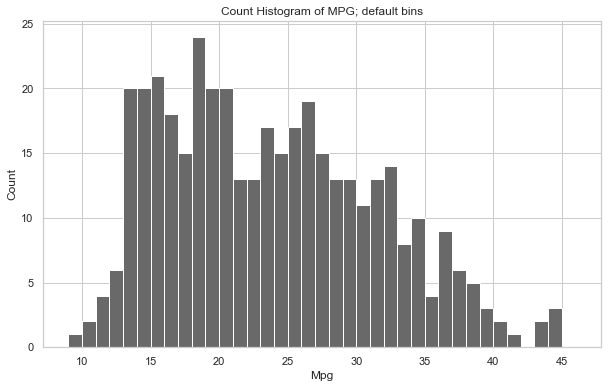

In [5]:
figure = plt.figure(figsize=(10, 6))
bins = [ i+9 for i in range(0, 38, 1)]
axes = figure.add_subplot(1, 1, 1)
axes.hist( auto["mpg"],bins = bins, color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Mpg")
axes.set_title("Count Histogram of MPG; default bins")

plt.show()
plt.close()

There is a leftward skew in the 15-20 mpg range in a distribution that otherwise resembles the normal distribution. 

#### 1.2.1.2 Cylinders <a class="anchor" id="Cylinders"></a>

Cylinders is a categorical variable that represents how many cylinders are in a cars engine. These are typically 4, 6 or 8 cylinders. Lets look at the distribution of cylinders across the cars

In [6]:
pd.DataFrame(auto["cylinders"].value_counts(normalize = True).sort_index())

,cylinders
3,0.010050
4,0.512563
5,0.007538
6,0.211055
8,0.258794


As expected, the vast majority of cars have 4,6 or 8 cylinders. The cars with 3 or 5 cylinder bear further inspection as most cars have an even number

Listed below are all of the entries that have a 3 cylinder engine

In [7]:
auto.loc[auto["cylinders"] == 3,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
71,19.0,3,70.0,97,2330,13.5,72,3,"\t""mazda rx2 coupe"""
111,18.0,3,70.0,90,2124,13.5,73,3,"\t""maxda rx3"""
243,21.5,3,80.0,110,2720,13.5,77,3,"\t""mazda rx-4"""
334,23.7,3,70.0,100,2420,12.5,80,3,"\t""mazda rx-7 gs"""


All of the cars with a 3 cylinder engine come from the mazda rx family, which uses a Wankel rotary motor https://en.wikipedia.org/wiki/Mazda_Wankel_engine#12A. Thus it is reasonable that they have only 3 cylinder

Listed below are all of the entries that are listed with a 5 cyinder engine

In [8]:
auto.loc[auto["cylinders"] == 5,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
274,20.3,5,131.0,103,2830,15.9,78,2,"\t""audi 5000"""
297,25.4,5,183.0,77,3530,20.1,79,2,"\t""mercedes benz 300d"""
327,36.4,5,121.0,67,2950,19.9,80,2,"\t""audi 5000s (diesel)"""


These cars do in fact have 5 cylinders so this data also checks out
https://www.automobile-catalog.com/car/1980/167750/audi_5000_s_diesel.html

Here are the different probabilities of an example from the dataset having a certain number of cylinders visualized

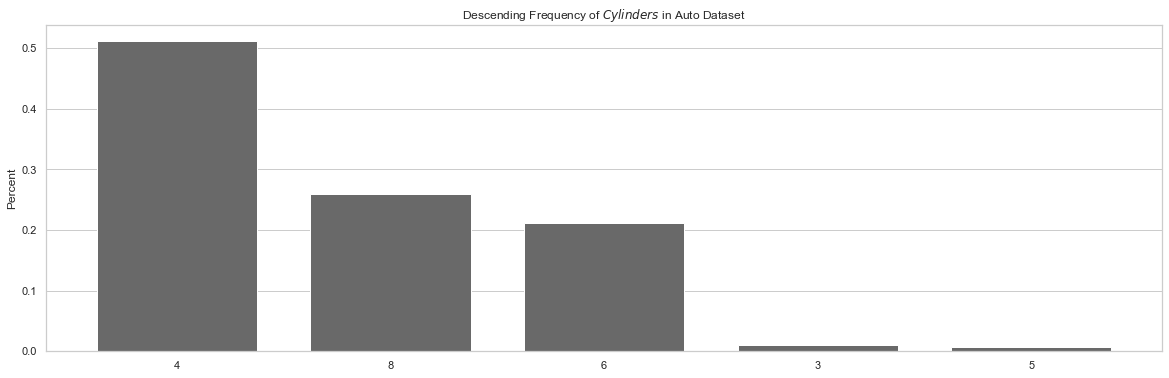

In [9]:
cyl_Dist = auto["cylinders"].value_counts(normalize=True).sort_index()
cyl_Dist_Ordered = cyl_Dist.sort_values(ascending=False)
labels = ['4','8','6','3','5']
x = [0,1,2,3,4]
width = 0.75
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, cyl_Dist_Ordered, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2,3,4])
axes.set_xticklabels(labels)
axes.set_title( "Descending Frequency of $Cylinders$ in Auto Dataset")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

The majority of the cars in the datset have 4 cylinders. 3 and 5 cylinders are outliers in the data

#### 1.2.1.3 Displacement <a class="anchor" id="Displacement"></a>

Displacement is a numerical variable that measures the engine displacement. The engines displacement is the volume of fuel swept by all of the pistons in a piston engine. For typical engine designs, the formula for calculating displacement is 
$Displacment = \pi \times strokeLength \times 0.5bore^2  \times number of cylinders$ 
For other engine designs that are 3 or 5 cylindered for example, a different formula is used that makes it comparable
reference: https://en.wikipedia.org/wiki/Engine_displacement

In [10]:
auto["displacement"].describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

There is a large amount of variance present in the displacement data. The mean is a good deal larger than the median, indicating there is rightward skew from some large outliers.

The distribution of the displacement can be visualzed

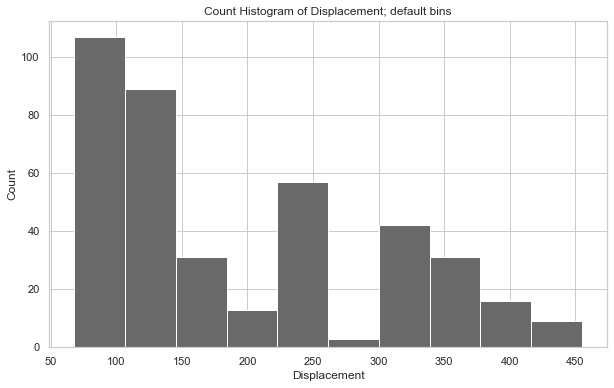

In [11]:
figure = plt.figure(figsize=(10, 6))
bins = [ i+68 for i in range(0, 387, 5)]
axes = figure.add_subplot(1, 1, 1)
axes.hist( auto["displacement"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Displacement")
axes.set_title("Count Histogram of Displacement; default bins")

plt.show()
plt.close()

The distribution is almost a descending triangle similar to the pattern shown in mpg. 

#### 1.2.1.4 Horsepower <a class="anchor" id="Horsepower"></a>

Horsepower is a numerical variable which measures the capability of an engine compared to much many horses would be required to produce the same power.

In [12]:
auto["horsepower"].describe()

count    398.000000
mean     104.477387
std       38.199242
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

The median is lower then the mean so some high horsepower cars are skewing the distribution rightward. 

The distribution of horsepower can be seen in a histogram.

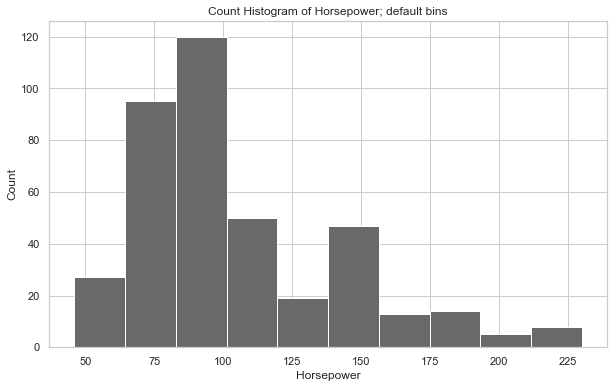

In [13]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist( auto["horsepower"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Horsepower")
axes.set_title("Count Histogram of Horsepower; default bins")

plt.show()
plt.close()

The distribution of horsepower appears multimodal with a first peak around 90 hp and a second around 150. 

#### 1.2.1.5 Weight <a class="anchor" id="Weight"></a>

The weight is a numerical variable that descrbies the total weight of car. A

In [14]:
auto["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

There is not much particulary notable from the descriptive statistics of weight. 

The distribution of weight can be visualized with a histogram

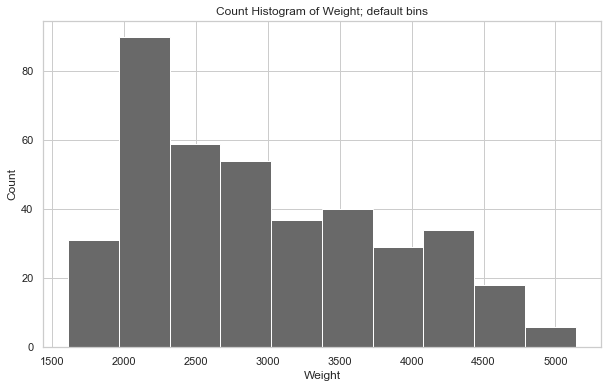

In [15]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist( auto["weight"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Weight")
axes.set_title("Count Histogram of Weight; default bins")

plt.show()
plt.close()

the weight distribution appears to be roughly descending triangle. 

#### 1.2.1.6 Acceleration  <a class="anchor" id="Acceleration"></a>

Accerelation is a numerical variable which measures how the acceleration of the car

In [16]:
auto["acceleration"].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

This dataset appears evenly balanced with no significant outliers shown in the descriptive statistics

The distribution of the acceleration of the various cars can be shown in a histogram

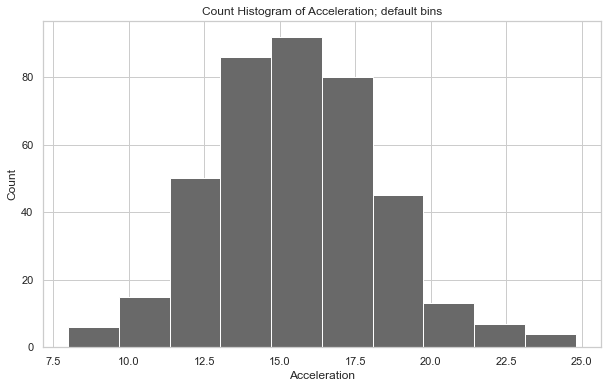

In [17]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist( auto["acceleration"], color="DimGray")
axes.set_ylabel( "Count")
axes.set_xlabel( "Acceleration")
axes.set_title("Count Histogram of Acceleration; default bins")

plt.show()
plt.close()

Acceleration appears normally distributed around the mean of the dataset.

#### 1.2.1.7 Model Year <a class="anchor" id="Model-Year"></a>

Model year is a categorical variable that contains the model year of the vehicle. The cars are all 20th century models

In [18]:
pd.DataFrame(auto["model year"].value_counts(normalize = True).sort_index())

,model year
70,0.072864
71,0.070352
72,0.070352
73,0.100503
74,0.067839
75,0.075377
76,0.085427
77,0.070352
78,0.090452
79,0.072864


The dataset appears evenly distributed between model years

Lets visualize the relative occurence of each model year in the dataset

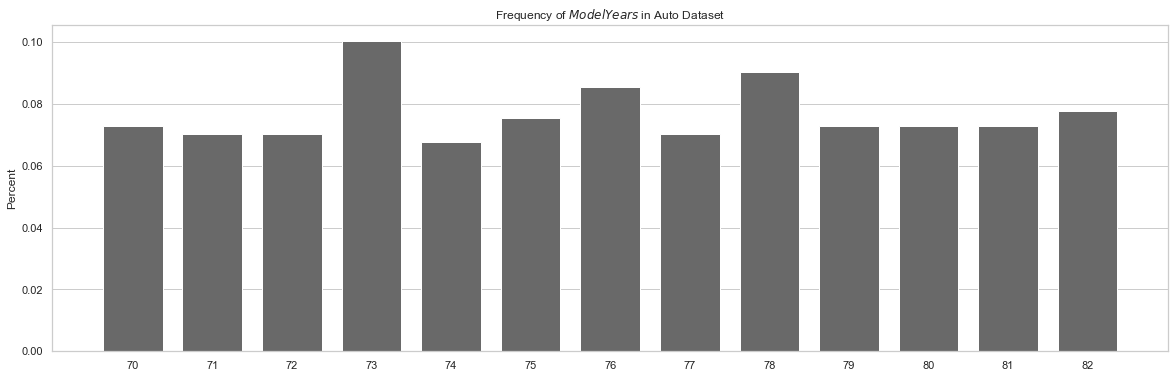

In [19]:
my_Dist = auto["model year"].value_counts(normalize=True).sort_index()
#my_Dist_Ordered = my_Dist.sort_values(ascending=False)
labels = ['70','71','72','73','74','75','76','77','78','79','80','81','82']
x = [0,1,2,3,4,5,6,7,8,9,10,11,12]
width = 0.75
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, my_Dist, width, color="dimgray", align="center")
axes.set_xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12])
axes.set_xticklabels(labels)
axes.set_title( "Frequency of $Model Years$ in Auto Dataset")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

A uniform distribution would approximately model the distribution of the model years. There are more 1973 and 1978 cars than average present in the dataset

#### 1.2.1.8 Origin  <a class="anchor" id="Origin"></a>

The origin variable tracks what country the car originated from. This a categorical variable.

In [20]:
pd.DataFrame(auto["origin"].value_counts(normalize = True).sort_index())

,origin
1,0.625628
2,0.175879
3,0.198492


Country 1 contains most of the cars. From inspection of the car names associated with the origins during the cylinders exploration, it is likely the 1 refers to cars made in the Americas, 2 refers to European cars, and 3 refers to Asian manufactured cars.

#### 1.2.1.9 Car Name <a class="anchor" id="Car-Name"></a>

The name of the car is a categorical variable. This will most likely be a unique identifier and of little direct use in modeling mpg

In [21]:
nameFrequency = pd.DataFrame(auto["car name"].value_counts(normalize = True).sort_index())
nameFrequency.describe()

,car name
count,305.000000
mean,0.003279
std,0.001937
min,0.002513
25%,0.002513
50%,0.002513
75%,0.002513
max,0.015075


There are 305 unique car names present in the data out of 389 entries. While most of the names are unique, not all are

Lets look at the names that arent unique in the data

In [22]:
nameFrequency = nameFrequency[nameFrequency["car name"] > 0.002513]
print(nameFrequency)

                                       car name
\t"amc concord"                        0.005025
\t"amc gremlin"                        0.010050
\t"amc hornet"                         0.010050
\t"amc matador (sw)"                   0.005025
\t"amc matador"                        0.012563
\t"audi 100ls"                         0.005025
\t"buick century"                      0.005025
\t"buick estate wagon (sw)"            0.005025
\t"buick skylark"                      0.005025
\t"chevrolet caprice classic"          0.007538
\t"chevrolet chevelle malibu classic"  0.005025
\t"chevrolet chevelle malibu"          0.005025
\t"chevrolet chevette"                 0.010050
\t"chevrolet citation"                 0.007538
\t"chevrolet impala"                   0.010050
\t"chevrolet malibu"                   0.005025
\t"chevrolet monte carlo landau"       0.005025
\t"chevrolet nova"                     0.007538
\t"chevrolet vega"                     0.007538
\t"datsun 210"                         0

These are the model names repeated throughout the dataset. 

Since these are basically just unique identifiers, there isnt a helpful visualization to use

### 1.2.2 Pairwise EDA <a class="anchor" id="Pairwise-EDA"></a>

#### 1.2.2.1 Displacement and Weight <a class="anchor" id="Displacement-And-Weight"></a>

The weight of the car influences the size of the engine, as thus its displacement, needed for the car. Therefore there should be a positive relationship between these two variables.

In [23]:
print( "r   =", stats.pearsonr(auto["displacement"], auto["weight"])[0])
print( "rho =", stats.spearmanr(auto["displacement"], auto["weight"])[0])

r   = 0.9328241468416343
rho = 0.9459855641801795


There is a strong relationship between these two variables. It is slightly more non-linear. Including both of these variables in the model may introduce mutlicollinearity.

The relationship between the two variables can be shown on a scatterplot. 

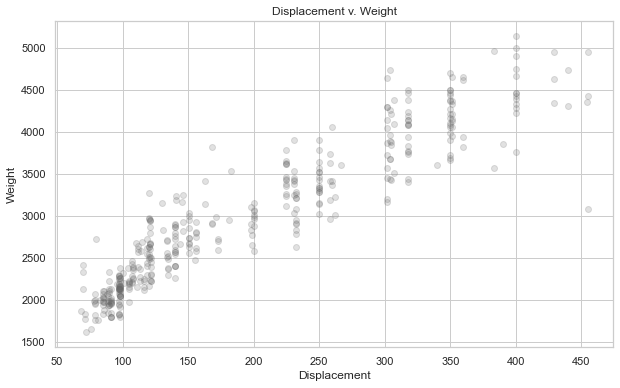

In [24]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["displacement"], auto["weight"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Displacement v. Weight")
axes.set_xlabel("Displacement")
axes.set_ylabel("Weight")

plt.show()
plt.close()

The relationship between displacement and weight is evident. It does appear there is more variance in the weight at higher levels of displacement. 

#### 1.2.2.2 Displacement and Horsepower <a class="anchor" id="Displacement-And-Horsepower"></a>

Larger engines tend to produce more horsepower, therefore there should be a strong positive correlation between the two. 

In [25]:
print( "r   =", stats.pearsonr(auto["displacement"], auto["horsepower"])[0])
print( "rho =", stats.spearmanr(auto["displacement"], auto["horsepower"])[0])

r   = 0.8935152387619708
rho = 0.8658584753264917


There is a strong linear relationship between the two variables

The relationship can be visualized with a scatterplot

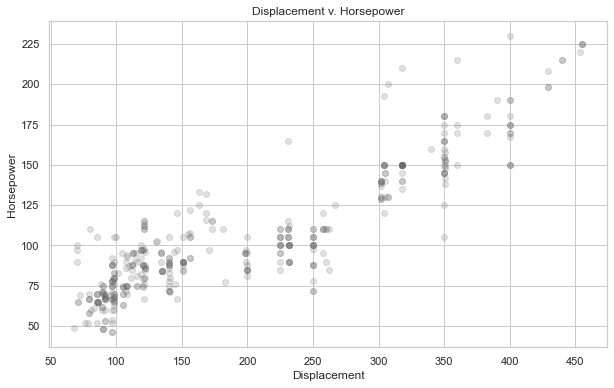

In [26]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["displacement"], auto["horsepower"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Displacement v. Horsepower")
axes.set_xlabel("Displacement")
axes.set_ylabel("Horsepower")

plt.show()
plt.close()

There are two clear linear clusters in this data, displacements under 200 and displacements above 200. These each have distinct but different linear relationship.

#### 1.2.2.3 Displacement and Cylinders <a class="anchor" id="Displacement-And-Cylinders"></a>

An engine with more cylinders wil be larger and therefore have a larger displacement. The cylinders count should identify which segment in the displacement data the car belongs to

In [27]:
cylinderGroup = auto.groupby("cylinders")
displacementByCylStats = cylinderGroup["displacement"].describe()
print(displacementByCylStats)

           count        mean        std    min     25%    50%     75%    max
cylinders                                                                   
3            4.0   72.500000   5.000000   70.0   70.00   70.0   72.50   80.0
4          204.0  109.796569  21.512147   68.0   91.00  105.0  121.25  156.0
5            3.0  145.000000  33.286634  121.0  126.00  131.0  157.00  183.0
6           84.0  218.142857  32.293512  145.0  199.75  228.0  250.00  262.0
8          103.0  345.009709  46.776376  260.0  305.00  350.0  360.00  455.0


There is a clear distinction between cars with less than 6 cylinders and cars with 6 or greater

the different major cylinder distributions can be visualized with small multiple histograms

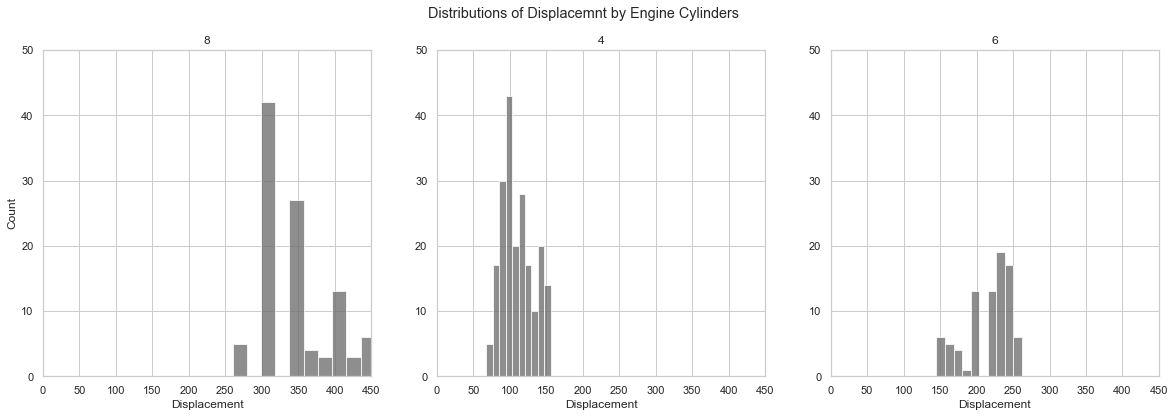

In [28]:
cylinders = pd.unique(auto["cylinders"].values)
cylinders = cylinders[0:3]

figure = plt.figure(figsize=(20, 6))
figure.suptitle("Distributions of Displacemnt by Engine Cylinders")

for i, x in enumerate(cylinders):
    
    axes = figure.add_subplot(1, 3, i + 1)
    subdata = cylinderGroup["displacement"].get_group(x).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,50))
    axes.set_xlim((0,450))
    if i == 0:
        axes.set_ylabel('Count')
    axes.set_xlabel('Displacement')

plt.show()
plt.close()

There is a very clear segmentation between the number of cylinders and the displacement of the engines. The overlap is almost nonexistent.

#### 1.2.2.4 Weight and Horsepower <a class="anchor" id="Weight-And-Horsepower"></a>

A stronger horsepower engine will be needed to move a heavier car so there should be a strong positive relationship between the two variables

In [29]:
print( "r   =", stats.pearsonr(auto["horsepower"], auto["weight"])[0])
print( "rho =", stats.spearmanr(auto["horsepower"], auto["weight"])[0])

r   = 0.8604571067649734
rho = 0.8677899087364905


There is indeed a strong positive relationship between the variables

The relationship can be visualized with a scatter point

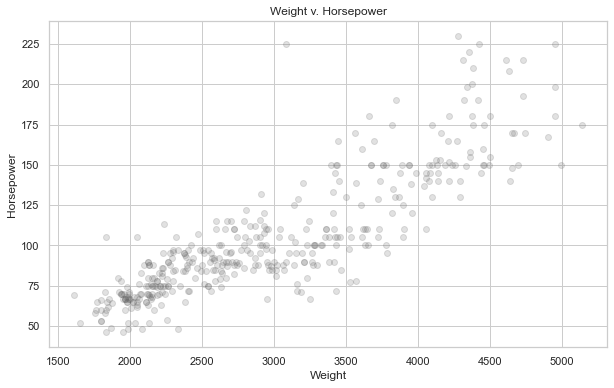

In [30]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["weight"], auto["horsepower"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Weight v. Horsepower")
axes.set_xlabel("Weight")
axes.set_ylabel("Horsepower")

plt.show()
plt.close()

The relationship is straighforwardly linear. there appears to be more varaince in the larger values of weight and horsepower. 

#### 1.2.2.5 Weight and Model Year <a class="anchor" id="Weight-And-Model-Year"></a>

The hypothesis is that cars will get lighter as the model year increases in an attempt to improve gas mileage. 

In [31]:
myGroup = auto.groupby("model year")
weightByMYStats = myGroup["weight"].describe()
print(weightByMYStats)

            count         mean          std     min      25%     50%      75%  \
model year                                                                      
70           29.0  3372.793103   852.868663  1835.0  2648.00  3449.0  4312.00   
71           28.0  2995.428571  1061.830859  1613.0  2110.75  2798.0  3603.25   
72           28.0  3237.714286   974.520960  2100.0  2285.50  2956.0  4169.75   
73           40.0  3419.025000   974.809133  1867.0  2554.50  3338.5  4247.25   
74           27.0  2877.925926   949.308571  1649.0  2116.50  2489.0  3622.50   
75           30.0  3176.800000   765.179781  1795.0  2676.75  3098.5  3662.25   
76           34.0  3078.735294   821.371481  1795.0  2228.75  3171.5  3803.75   
77           28.0  2997.357143   912.825902  1825.0  2135.00  2747.5  3925.00   
78           36.0  2861.805556   626.023907  1800.0  2282.50  2910.0  3410.00   
79           29.0  3055.344828   747.881497  1915.0  2556.00  3190.0  3725.00   
80           29.0  2436.6551

Just by looking at the number there is no clear pattern with weight.

The model year distributions may shed some insight

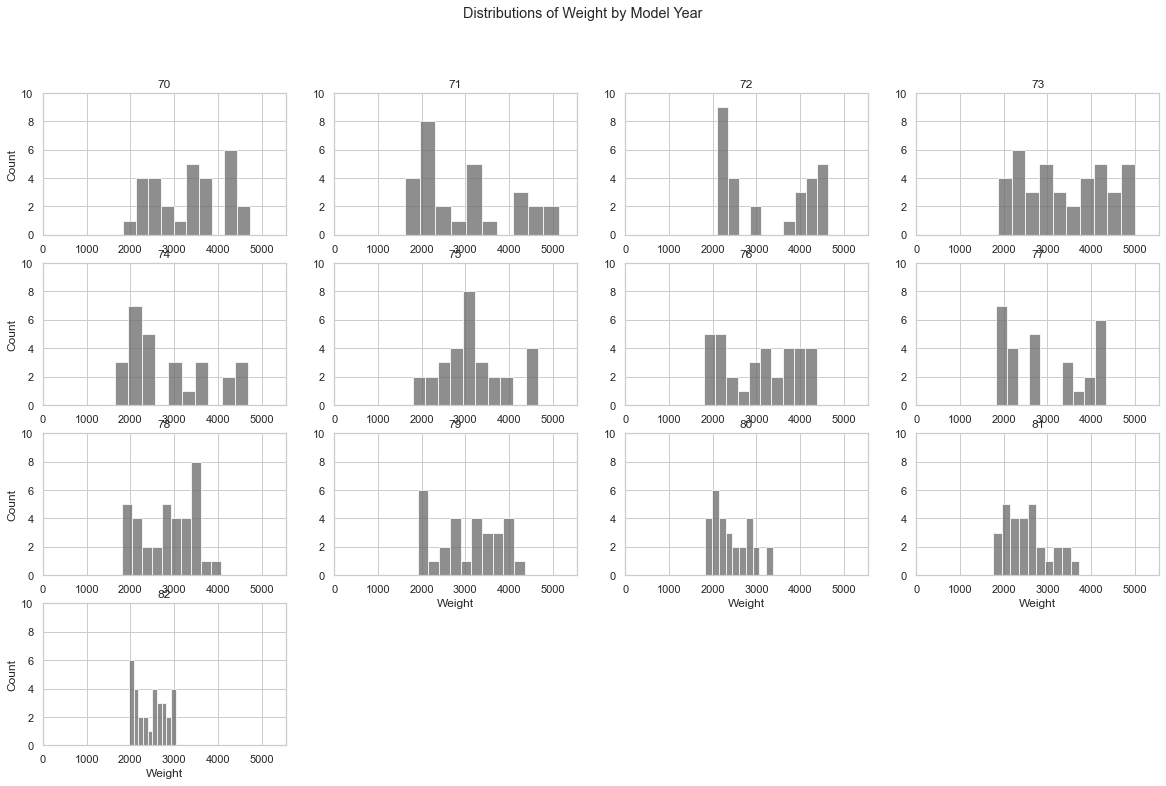

In [32]:

figure = plt.figure(figsize=(20, 12))
figure.suptitle("Distributions of Weight by Model Year")

model_year = pd.unique(auto['model year'])

for i, x in enumerate(model_year):
    
    axes = figure.add_subplot(4, 4, i + 1)
    subdata = myGroup["weight"].get_group(x).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,10))
    axes.set_xlim((0,5550))
    if i == 0 or i ==4 or i == 8 or i == 12:
        axes.set_ylabel('Count')
    if i == 9 or i == 10 or i == 11 or i == 12:
        axes.set_xlabel('Weight')

plt.show()
plt.close()

The biggest trend from this pairwise analysis is the reduction in heavier than average produced as the model year increases. 

#### 1.2.2.6 Displacement and Model Year <a class="anchor" id="Displacement-And-Model-Year"></a>

Lets look and see if changes in displacement can explain mpg differences across model years

In [33]:
myGroup = auto.groupby("model year")
dispByMYStats = myGroup["displacement"].describe()
print(dispByMYStats)

            count        mean         std   min     25%    50%     75%    max
model year                                                                   
70           29.0  281.413793  124.421380  97.0  198.00  307.0  383.00  455.0
71           28.0  209.750000  115.102410  71.0   97.75  228.5  273.00  400.0
72           28.0  218.375000  123.781964  70.0  109.25  131.0  326.00  429.0
73           40.0  256.875000  121.722085  68.0  121.75  276.0  350.25  455.0
74           27.0  171.740741   92.601127  71.0   90.00  122.0  250.00  350.0
75           30.0  205.533333   87.669730  90.0  121.00  228.0  250.00  400.0
76           34.0  197.794118   94.422256  85.0  102.50  184.0  291.00  351.0
77           28.0  191.392857  107.813742  79.0   97.75  143.0  270.50  400.0
78           36.0  177.805556   76.012713  78.0  115.50  159.5  231.00  318.0
79           29.0  206.689655   96.307581  85.0  121.00  183.0  302.00  360.0
80           29.0  115.827586   33.744914  70.0   90.00  107.0  

The displacement drops rapidly in the later model years as the effect of the 1970's oil crisis make fuel efficiency a priority. The 75% and max see a large decrease as fuel inefficient cars are selected out of the market. 

This can be visualized with histograms

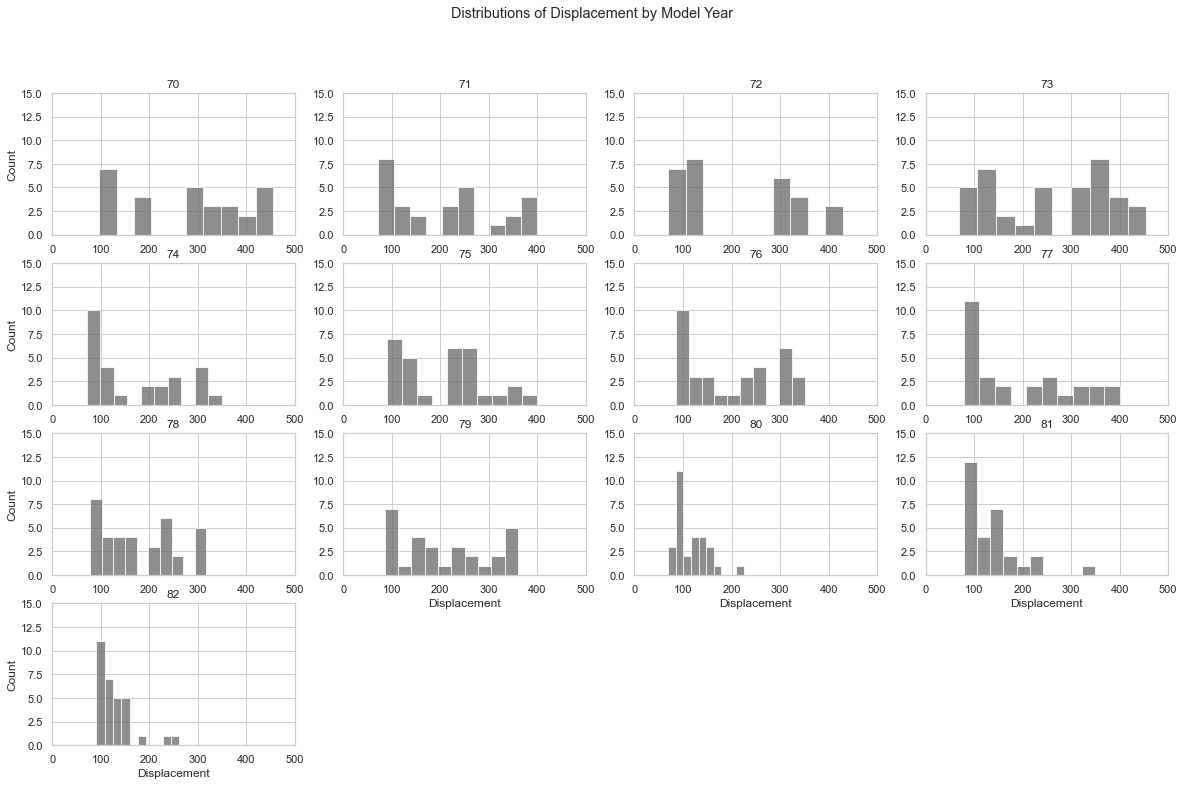

In [34]:
figure = plt.figure(figsize=(20, 12))
figure.suptitle("Distributions of Displacement by Model Year")

model_year = pd.unique(auto['model year'])

for i, x in enumerate(model_year):
    
    axes = figure.add_subplot(4, 4, i + 1)
    subdata = myGroup["displacement"].get_group(x).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,15))
    axes.set_xlim((0,500))
    if i == 0 or i ==4 or i == 8 or i == 12:
        axes.set_ylabel('Count')
    if i == 9 or i == 10 or i == 11 or i == 12:
        axes.set_xlabel('Displacement')

plt.show()
plt.close()

The histogram of every year makes it evident how the number of vechiles produced with a high displacement, that of over 300, decline the further into the 70's and 80's it gets. 

### 1.2.2.7 Horsepower and Acceleration <a class="anchor" id="Horsepower-And-Acceleration"></a>

The pairwise relationship between horsepower and acceleration is worth exploring as deviation in the relationship between the power provided by the engine and how fast the car accelerates may result from the same factors which impact the mpg differences between similar cars. 

In [35]:
print( "r   =", stats.pearsonr(auto["horsepower"], auto["acceleration"])[0])
print( "rho =", stats.spearmanr(auto["horsepower"], auto["acceleration"])[0])

r   = -0.6841250325934706
rho = -0.647420013931888


There is some linear correlation between horsepower and acceleration

The correlation can be visualized with a scatterplot

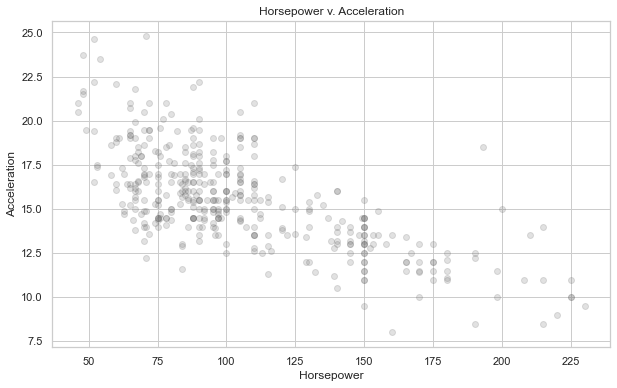

In [36]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["horsepower"], auto["acceleration"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Horsepower v. Acceleration")
axes.set_xlabel("Horsepower")
axes.set_ylabel("Acceleration")

plt.show()
plt.close()

The roughly linear relationship between acceleration and horsepower can be seen. Lower horsepower related to faster acceleration generally. There is enough variation between the acceleration of similar horsepower vehicles however that this is not a strong linear correlation.

#### 1.2.2.8 Cylinders and Origin <a class="anchor" id="Cylinders-And-Origin"></a>

It is worth seeing if certain cylinder types come exclusively from a particular origin. 

In [37]:
originOfCylinders = pd.crosstab( auto[ "cylinders"], auto[ "origin"]).apply(lambda r: r/len(auto), axis=1)
print(originOfCylinders)

origin            1         2         3
cylinders                              
3          0.000000  0.000000  0.010050
4          0.180905  0.158291  0.173367
5          0.000000  0.007538  0.000000
6          0.185930  0.010050  0.015075
8          0.258794  0.000000  0.000000


There are certain cylinder types that stand in for certain regions. An 8 cylinder vehicle comes from origin 1, a 5 cylinder from origin 2, and a 3 cylinder from origin 3. From this it can be inferred the three origins could be the US, Europe and Japan. 

A heatmap may make takeaways more evident

<AxesSubplot:xlabel='origin', ylabel='cylinders'>

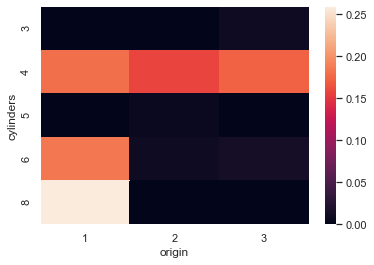

In [38]:
sns.heatmap(originOfCylinders)

The heatmap makes it clear the vast majority of cars from other origins are 4 cylinder.

#### 1.2.2.9 Cylinders and Mpg <a class="anchor" id="Cylinders-And-Mpg"></a>


Cylinders and mpg should be related. More cylinders mean the engine is consuming more gasoline at once, which would tend ot decrease fuel efficiency. The 3 and 5 cylinder engines use a different engine structure and may not fit this trend.

In [39]:
cylinderGroup = auto.groupby("cylinders")
mpgByCylStats = cylinderGroup["mpg"].describe()
print(mpgByCylStats)

           count       mean       std   min    25%    50%    75%   max
cylinders                                                             
3            4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7
4          204.0  29.286765  5.710156  18.0  25.00  28.25  33.00  46.6
5            3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4
6           84.0  19.985714  3.807322  15.0  18.00  19.00  21.00  38.0
8          103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6


The hypothesis is largely borne out here, as the 4 cylinder cars have a definitevely higher fuel efficieny.

Lets look at the distributions for the 4,6 and 8 cylinder cases that make up the majority of the car data to determine how much overlap there is between the cylinder types.

In [40]:
cylinders = pd.unique(auto["cylinders"].values)
cylinders = cylinders[0:3]
print(cylinders)

[8 4 6]


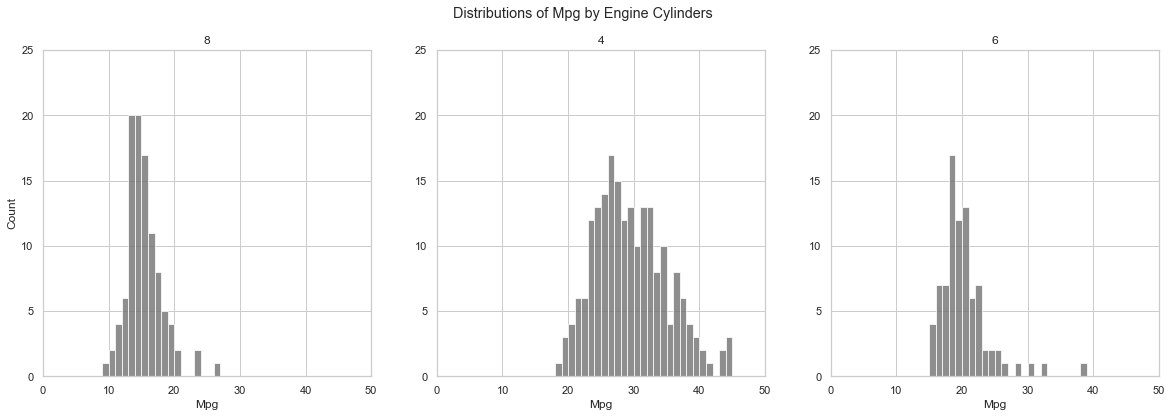

In [41]:
bins = [ i+9 for i in range(0, 38, 1)]
figure = plt.figure(figsize=(20, 6))
figure.suptitle("Distributions of Mpg by Engine Cylinders")

for i, x in enumerate(cylinders):
    
    axes = figure.add_subplot(1, 3, i + 1)
    subdata = cylinderGroup["mpg"].get_group(x).values
    axes.hist(subdata, bins=bins, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,25))
    axes.set_xlim((0,50))
    if i == 0:
        axes.set_ylabel('Count')
    axes.set_xlabel('Mpg')

plt.show()
plt.close()

The 6 and 8 cylinder cars have tight distributions around their means while the 4 cylinder vehicles have a wider distriution. There is some overlap between the 6 and 4 cylinder vehciles but very little between the 4 and 8. This should be a useful predictor for mpg.

#### 1.2.2.10 Displacement and Mpg <a class="anchor" id="Displacement-And-Mpg"></a>

     

A larger displacement means a larger engine. Since larger engine generate more power, generally to carry more weight, a larger displacement should lead to a lower fuel efficiency.

In [42]:
print( "r   =", stats.pearsonr(auto["displacement"], auto["mpg"])[0])
print( "rho =", stats.spearmanr(auto["displacement"], auto["mpg"])[0])

r   = -0.8042028248058979
rho = -0.8556920118178749


There is a negative nonlinear correlation between displacement, supporting the hypothesis. This correlation is also non-linear

The non-linearity in the correlation can be visualized with a scatter plot

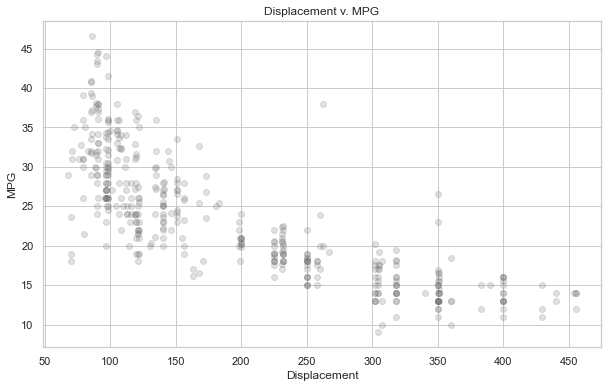

In [43]:
figure = plt.figure(figsize=(10, 6))


axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["displacement"], auto["mpg"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Displacement v. MPG")
axes.set_xlabel("Displacement")
axes.set_ylabel("MPG")

plt.show()
plt.close()

This relationship resembles an inverse exponetial relationship between displacement and mpg.

 #### 1.2.2.11 Horsepower and Mpg <a class="anchor" id="Horsepower-And-Mpg"></a>
 
     

To get more power, more gas consumption is needed. Typically, more horsepower is needed to move a heavier wieght as well. For these reason the hypothesis is that the a larger horsepower will decrease the gas mileage of the car.

In [44]:
print( "r   =", stats.pearsonr(auto["horsepower"], auto["mpg"])[0])
print( "rho =", stats.spearmanr(auto["horsepower"], auto["mpg"])[0])

r   = -0.7713155503650382
rho = -0.842511775303244


The hypothesis is correct there is a negative relationship present between gas mileage and horsepower. Additionally, the relationship is non-linear

The contours of that relationship can be visualized with a scatter plot.

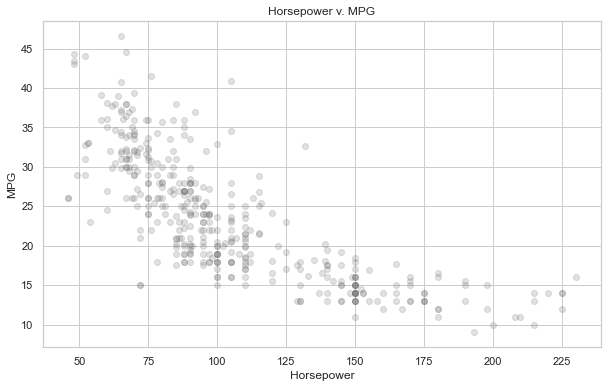

In [45]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["horsepower"], auto["mpg"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Horsepower v. MPG")
axes.set_xlabel("Horsepower")
axes.set_ylabel("MPG")

plt.show()
plt.close()

 #### 1.2.2.12 Weight and Mpg <a class="anchor" id="Weight-And-Mpg"></a>
 
 

the heavier a car is the more effort it takes to move. Typically, lighter cars have the best gas mileage so the prediction is these will be negative correlated

In [46]:
print( "r   =", stats.pearsonr(auto["weight"], auto["mpg"])[0])
print( "rho =", stats.spearmanr(auto["weight"], auto["mpg"])[0])

r   = -0.8317409332443352
rho = -0.8749473981990712


There is in fact a negative nonlinear correlation between weight and mpg

The relationship can be visualized with a scatterplot

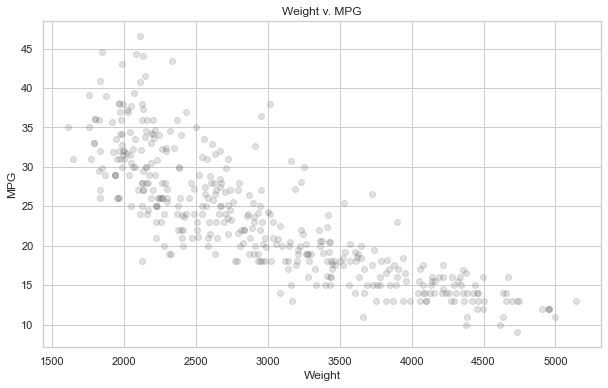

In [47]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["weight"], auto["mpg"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Weight v. MPG")
axes.set_xlabel("Weight")
axes.set_ylabel("MPG")

plt.show()
plt.close()

There appears to be a negative exponential relationship between weight and mpg 

#### 1.2.2.13 Acceleration and Mpg <a class="anchor" id="Acceleration-And-Mpg"></a>

The hypothesis is that because faster acceleration requires more power and presumably fuel, cars that accelerate faster will be less fuel efficient

In [48]:
print( "r   =", stats.pearsonr(auto["acceleration"], auto["mpg"])[0])
print( "rho =", stats.spearmanr(auto["acceleration"], auto["mpg"])[0])

r   = 0.4202889121016507
rho = 0.4386774795708622


The hyptothesis is incorrect, there is an insignificant positive relationship between acceleration the 

the relationship can be visualized with a scatter plot to see if any information can be gained from acceleration

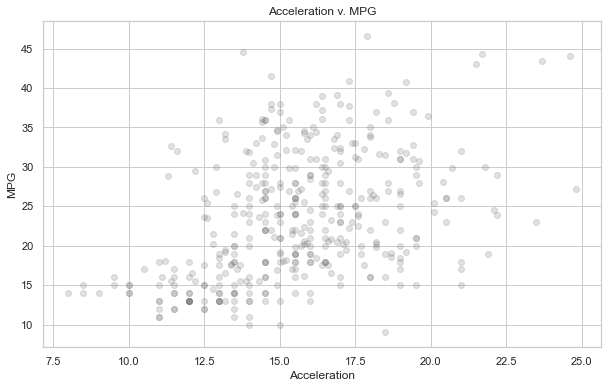

In [49]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(auto["acceleration"], auto["mpg"],marker="o", color="DimGray",alpha = 0.2)
axes.set_title("Acceleration v. MPG")
axes.set_xlabel("Acceleration")
axes.set_ylabel("MPG")

plt.show()
plt.close()

While the trend between acceleration and mpg is generally positive, there are no striking conclusions that can be drawn from the analysis. 

#### 1.2.2.14 Model Year and Mpg <a class="anchor" id="Model-Year-And-Mpg"></a>

     

As technology improves and due to the gas shortages in the 1970s, the expectation is that the mpg for the cars will improve over time

In [50]:
myGroup = auto.groupby("model year")
myStats = myGroup["mpg"].describe()
print(myStats)

            count       mean       std   min     25%    50%     75%   max
model year                                                               
70           29.0  17.689655  5.339231   9.0  14.000  16.00  22.000  27.0
71           28.0  21.250000  6.591942  12.0  15.500  19.00  27.000  35.0
72           28.0  18.714286  5.435529  11.0  13.750  18.50  23.000  28.0
73           40.0  17.100000  4.700245  11.0  13.000  16.00  20.000  29.0
74           27.0  22.703704  6.420010  13.0  16.000  24.00  27.000  32.0
75           30.0  20.266667  4.940566  13.0  16.000  19.50  23.000  33.0
76           34.0  21.573529  5.889297  13.0  16.750  21.00  26.375  33.0
77           28.0  23.375000  6.675862  15.0  17.375  21.75  30.000  36.0
78           36.0  24.061111  6.898044  16.2  19.350  20.70  28.000  43.1
79           29.0  25.093103  6.794217  15.5  19.200  23.90  31.800  37.3
80           29.0  33.696552  7.037983  19.1  29.800  32.70  38.100  46.6
81           29.0  30.334483  5.591465

The means of the mpg for the cars bear out the hypothesis as they steadily increase for the most part with the year. 

The distributions of mpg for each model year in the dataset can be analyzed to see trends across the model years.

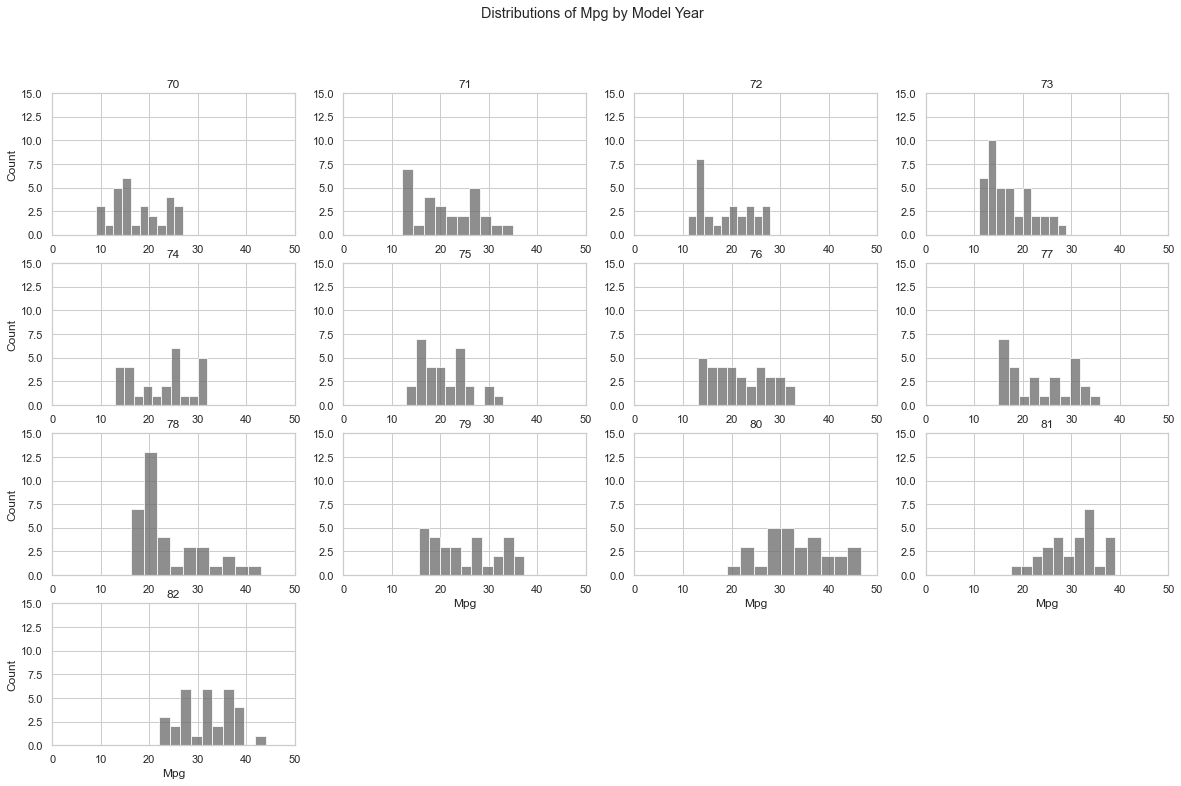

In [51]:

figure = plt.figure(figsize=(20, 12))
figure.suptitle("Distributions of Mpg by Model Year")

model_year = pd.unique(auto['model year'])

for i, x in enumerate(model_year):
    
    axes = figure.add_subplot(4, 4, i + 1)
    subdata = myGroup["mpg"].get_group(x).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,15))
    axes.set_xlim((0,50))
    if i == 0 or i ==4 or i == 8 or i == 12:
        axes.set_ylabel('Count')
    if i == 9 or i == 10 or i == 11 or i == 12:
        axes.set_xlabel('Mpg')

plt.show()
plt.close()

The most notable part of the distributions is how the mpg increases over time. Additionally, the mpg distributions for different model years do not have a consistent pattern. 

#### 1.2.2.15 Origin and Mpg <a class="anchor" id="Origin-And-Mpg"></a>

The default hypothesis for the origin is that there be no difference in mpg

In [52]:
originGroup = auto.groupby("origin")
originStats = originGroup["mpg"].describe()
print(originStats)

        count       mean       std   min   25%   50%    75%   max
origin                                                           
1       249.0  20.083534  6.402892   9.0  15.0  18.5  24.00  39.0
2        70.0  27.891429  6.723930  16.2  24.0  26.5  30.65  44.3
3        79.0  30.450633  6.090048  18.0  25.7  31.6  34.05  46.6


There is a stark difference between groups 2 and 3 versus group 1

The distributions of the cars can be plotted to see the shape of the gap between origin 1 and origins' 2 and 3.

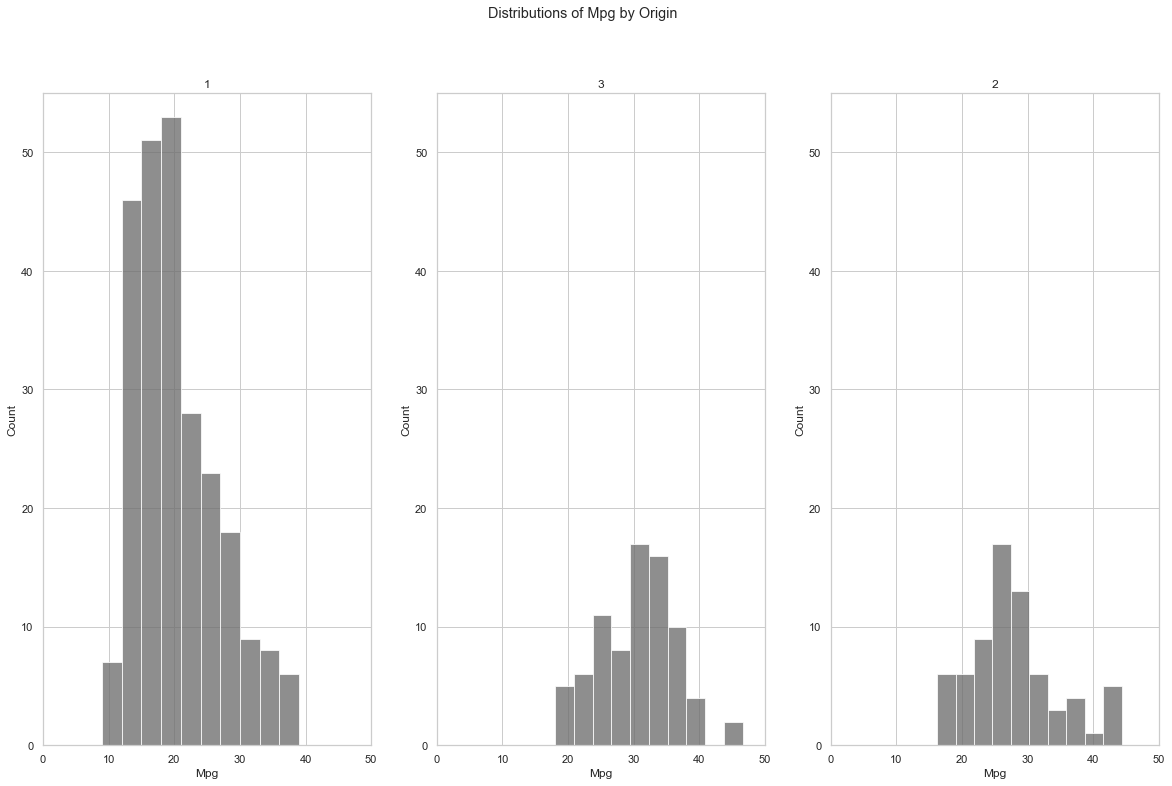

In [53]:

figure = plt.figure(figsize=(20, 12))
figure.suptitle("Distributions of Mpg by Origin")

origins = pd.unique(auto['origin'])

for i, x in enumerate(origins):
    
    axes = figure.add_subplot(1, 3, i + 1)
    subdata = originGroup["mpg"].get_group(x).values
    axes.hist(subdata, alpha=0.75, color="DimGray")
    axes.set_title(x)
    axes.set_ylim((0,55))
    axes.set_xlim((0,50))
    axes.set_ylabel('Count')
    
    axes.set_xlabel('Mpg')

plt.show()

Groups 2 and 3 lack the low mpg vehicles that pull group 1's distribution lower than the other two. 

#### 1.2.2.16 Car Name and Mpg <a class="anchor" id="Car-Name-And-Mpg"></a>

Since this is essentialy a unique identifier is will not be used in the model

 ## 1.3 - Build the model  <a class="anchor" id="Build"></a>

### 1.3.1 -  The Null model <a class="anchor" id="Null"></a>

The null model of the mpg is the mean.

In [54]:
auto['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

The mean is 23 mpg.

### 1.3.2 The All In Model <a class="anchor" id="All-in"></a>

The first step in building the linear regression model with a target variable mpg is to build a model with all of the features. Before that can happen all of the categorical variables need to be one-hot encoded. Cylinders, model year and origin will all be processed

In [55]:
auto = pd.concat([auto, pd.get_dummies(auto["cylinders"],prefix="cylinder")], axis=1)
auto = pd.concat([auto, pd.get_dummies(auto["model year"],prefix="model_year")], axis=1)
auto = pd.concat([auto, pd.get_dummies(auto["origin"], prefix="origin")], axis=1)
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'cylinder_3',
       'cylinder_4', 'cylinder_5', 'cylinder_6', 'cylinder_8', 'model_year_70',
       'model_year_71', 'model_year_72', 'model_year_73', 'model_year_74',
       'model_year_75', 'model_year_76', 'model_year_77', 'model_year_78',
       'model_year_79', 'model_year_80', 'model_year_81', 'model_year_82',
       'origin_1', 'origin_2', 'origin_3'],
      dtype='object')


The car name will not be included in the model as it is essentially a single entry identifier for each entry 

The full featured model  will use a 4 cylinder, 1970 car with origin 1 for the base effect. This will form a strong base effect to model car change in gas mileage from the starting point of 1970. For all of the variables in the model, here is the predicted impacted that variable will have on the model:

* **displacement** - Should have a negative relationship, more fuel consumption means less fuel efficiency all else equal
* **horsepower** - should have a negative relatioship, more horsepower is needed to haul more weight which reduces fuel efficieincy
* **weight** - should have a negative relationship, heavier cars take more fuel to move the same distance.
* **acceleration** - should have a positive relationship, things that slow accelerationg also slow fuel efficiency
* **cylinder_3** - should have a negative relationship contrasted with 4 cylinder engines, rotary engines less efficient
* **cylinder_5** - should have a negative relationship contrasted with 4 cylinder engines, rotary engines less efficient
* **cylinder_6** - should have a negative relationship contrasted with 4 cylinder engines, more cylinders means more gas usage
* **cylinder_8** - should have a negative relationship contrasted with 4 cylinder engines, more cylinders means more gas usage
* **model_year_71** - should have a close to neutral relationship
* **model_year_72** - should have a close to neutral relationship
* **model_year_73** - should have a close to neutral relationship
* **model_year_74** - should have a close to neutral relationship
* **model_year_75** - should have a close to neutral relationship
* **model_year_76** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_77** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_78** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_79** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_80** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_81** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **model_year_82** - should have a positive relationship, fuel efficiency improves in the later 70's early 80s
* **origin_2** - should have a positive relationship, more fuel efficient vehicles come from other locations besides US
* **origin_3** - should have a positive relationship, more fuel efficient vehicles come from other locations besides US

 
  


In [56]:
results_all = models.bootstrap_linear_regression("mpg ~ displacement + horsepower + weight + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_all))

Model: mpg ~ displacement + horsepower + weight + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-------------  ----------  -----  -------  -----
                                  95% BCI
Coefficients               Mean   Lo       Hi
               $\beta_0$   37.71  33.09    41.66
displacement   $\beta_1$   0.01   0.00     0.03
horsepower     $\beta_2$   -0.04  -0.06    -0.01
weight         $\beta_3$   -0.01  -0.01    -0.00
acceleration   $\beta_4$   0.02   -0.18    0.23
cylinder_3     $\beta_5$   -6.84  -9.37    -2.98
cylinder_5     $\beta_6$   -0.25  -5.64    4.84
cylinder_6     $\beta_7$   -2.42  -3.67    -1.32
cylinder_8     $\beta_8$   -0.26  -2.81    1.96
model_year_71  $\beta_9$   1.02   -0.18    1.94
model_year_72  $\beta_10$  -0.36  -1.34    0.59
model_year_73  $\beta_11$  -0.47  -

The first attempt has a decent $R^2$, which has an average value of 0.87. However, there are alot of coefficients present in the model. Lets account for that effect with the adjusted $R^2$ metric.

In [57]:
models.adjusted_r_squared(results_all)

0.8648518724636814

The adjusted $R^2$ is close to equivalent to the mean which means the large number of residuals are not inflating the $R^2$ metric and the model is in fact a decent representation. 

### 1.3.3 Mulitcollinearity  <a class="anchor" id="Multi"></a>

All of the coefficients and metrics discussed in assessing the original model are the average coefficients from the bootstrapped model. All of the coefficients and metrics have associated 95% Credible Intervals (CI). One possible explanation for the width of the credible interval is multi-collinearity from similiar variables. From the EDA, we know weight, horsepower and displacement are all highly correlated. Displacement and horsepower are correlated by 0.89, displacement and weight are correlated by 0.93, and weight and horsepower are correlated by 0.86. Accelerations correlations to other variables were not studied earlier and so are analyzed here

In [58]:
print( "r   =", stats.pearsonr(auto["acceleration"], auto["horsepower"])[0])
print( "r   =", stats.pearsonr(auto["acceleration"], auto["weight"])[0])
print( "r   =", stats.pearsonr(auto["acceleration"], auto["displacement"])[0])


r   = -0.6841250325934706
r   = -0.41745731994039326
r   = -0.5436840835009299


Acceleration is not nearly as correlated as the other three numerical variables

Knowing the variables are correlated, how can this be addressed? The variables cannot be added as is, as they all have different units. Additionally, a multplication or other direct combination of the three does not make physical sense. 

Since displacement is a direct measure of the amount of fuel used by the engine, it makes the most sense to keep this term in the model and remove the other two terms. Additionally, since the number of cylinders is directly included in the calculation of engine displacement, those categorical terms can be removed as well. However, weight is more closely correlated with the target variable, mpg, and accounts for other design decisions outside of the engine that can impact fuel efficiency. Lets examine the residuals to see if they can help break the tie between the models. 
Lets figure out the relative impact of each of the coefficients on the model, and use that to select between them. This can be done be mean scaling these features, and then comparing those coefficients.

In [59]:
#from course notes Linear Models part II-transformations
def mean_scale( df, variable):
    x_bar = df[ variable].mean()
    std = df[ variable].std()
    scaled_variable = (df[ variable] - x_bar) / (2.0 * std) # suggested by Gelman
    df[ variable + "_scaled"] = scaled_variable

In [60]:
scalingVariables = pd.DataFrame(np.zeros((2,3)),index = ['mean','std'],columns = ["weight","horsepower","displacement"])
weight_stats = auto['weight'].describe()
scalingVariables.iloc[0,0] = weight_stats['mean']
scalingVariables.iloc[1,0] = weight_stats['std']
mean_scale(auto,'weight')
disp_stats = auto['displacement'].describe()
scalingVariables.iloc[0,1] = disp_stats['mean']
scalingVariables.iloc[1,1] = disp_stats['std']
mean_scale(auto,'displacement')
hp_stats = auto['horsepower'].describe()
scalingVariables.iloc[0,2] = hp_stats['mean']
scalingVariables.iloc[1,2] = hp_stats['std']
mean_scale(auto,'horsepower')
print(tabulate(scalingVariables,headers=scalingVariables.columns))

        weight    horsepower    displacement
----  --------  ------------  --------------
mean  2970.42        193.426        104.477
std    846.842       104.27          38.1992


The scaling parameters are recorded here for future reproducibility.

The model with the scaled parameters is shown below

In [61]:
results_all = models.bootstrap_linear_regression("mpg ~ displacement_scaled + horsepower_scaled + weight_scaled + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_all))

Model: mpg ~ displacement_scaled + horsepower_scaled + weight_scaled + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-------------------  ----------  -----  -------  -----
                                        95% BCI
Coefficients                     Mean   Lo       Hi
                     $\beta_0$   20.09  17.08    23.58
displacement_scaled  $\beta_1$   2.60   -0.12    6.03
horsepower_scaled    $\beta_2$   -2.74  -4.39    -1.42
weight_scaled        $\beta_3$   -9.28  -11.96   -7.12
acceleration         $\beta_4$   0.02   -0.18    0.19
cylinder_3           $\beta_5$   -6.84  -9.87    -4.10
cylinder_5           $\beta_6$   -0.25  -6.10    5.13
cylinder_6           $\beta_7$   -2.42  -3.67    -1.14
cylinder_8           $\beta_8$   -0.26  -2.13    1.74
model_year_71        $\beta_9$   1.02 

Weight has the largest absolute value impact on the model of the three, which leans in its favor for being kept. Before removing any variables lets also check the residuals. 

### 1.3.4 Residuals <a class="anchor" id="Residuals"></a>

Lets look at residuals for places to improve the model as well 

In [62]:
def plot_residuals(result, variables):
    figure = plt.figure(figsize=(20,6))

    plots = len( variables)
    rows = (plots // 2) + 1

    residuals = np.array([r[0] for r in result["residuals"]])
    limits = max(np.abs(residuals.min()), residuals.max())
    
    n = result["n"]
    for i, variable in enumerate( variables):
        axes = figure.add_subplot(rows, 2, i + 1)

        keyed_values = sorted(zip(auto[variable].values, residuals), key=lambda x: x[ 0])
        ordered_residuals = [x[ 1] for x in keyed_values]

        axes.plot(list(range(0, n)), ordered_residuals, '.', color="dimgray", alpha=0.75)
        axes.axhline(y=0.0, xmin=0, xmax=n, c="firebrick", alpha=0.5)
        axes.set_ylim((-limits, limits))
        axes.set_ylabel("residuals")
        axes.set_xlabel(variable)

    plt.show()
    plt.close()
    
    return residuals

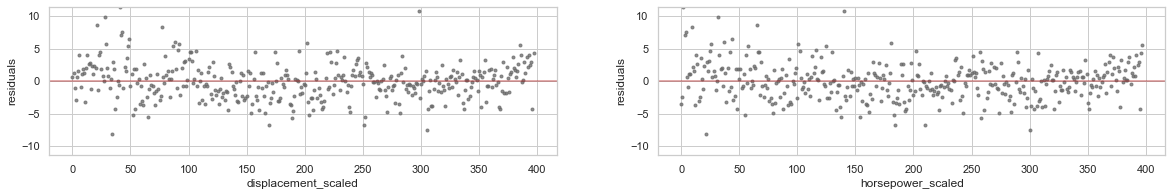

In [63]:
residuals1 = plot_residuals(results_all, ["displacement_scaled","horsepower_scaled"])

There appears to be a slight curve to the displacement and horsepower residuals.

The residuals for the other two numerical variables are shown 

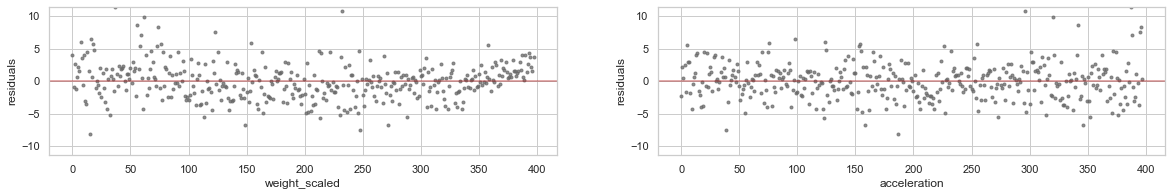

In [64]:
residuals1 = plot_residuals(results_all, ["weight_scaled","acceleration"])

The same curve present in the displacement and horsepower can be seen, indicating non linear behavior in three of the four numerical variables. Before making any further decisions about the model, the non-linearity should be corrected.

### 1.3.5 Transforms <a class="anchor" id="Transforms"></a>

In the EDA it was observed that all three of the numerical variables shown with the curve in their residuals have a similar negative log relationship with mpg. Therefore, they will be log transformed to attempt to correct the residuals. To use the scaled varaibles, the log transform will be taken first and then the variables will be scaled.

In [65]:
auto['log_weight'] = np.log(auto['weight'])
logScalingVariables = pd.DataFrame(np.zeros((2,3)),index = ['mean','std'],columns = ["log_weight","log_horsepower","log_displacement"])
log_weight_stats = auto['log_weight'].describe()
logScalingVariables.iloc[0,0] = log_weight_stats['mean']
logScalingVariables.iloc[1,0] = log_weight_stats['std']
auto['log_horsepower'] = np.log(auto['horsepower'])
log_horsepower_stats = auto['log_horsepower'].describe()
logScalingVariables.iloc[0,1] = log_horsepower_stats['mean']
logScalingVariables.iloc[1,1] = log_horsepower_stats['std']
auto['log_displacement'] = np.log(auto['displacement'])
log_displacement_stats = auto['log_displacement'].describe()
logScalingVariables.iloc[0,2] = log_displacement_stats['mean']
logScalingVariables.iloc[1,2] = log_displacement_stats['std']
mean_scale(auto,'log_weight')
mean_scale(auto,'log_displacement')
mean_scale(auto,'log_horsepower')
print("Scaling Parameters")
print(logScalingVariables)


Scaling Parameters
      log_weight  log_horsepower  log_displacement
mean    7.956890        4.588927          5.123174
std     0.280665        0.340869          0.531279


The scaling parameters are shown above to keep track of for scaling further data. 

To check the impact of the log transform on the mpg lets take a look at the scatterplot again to see if the relationship is more linear

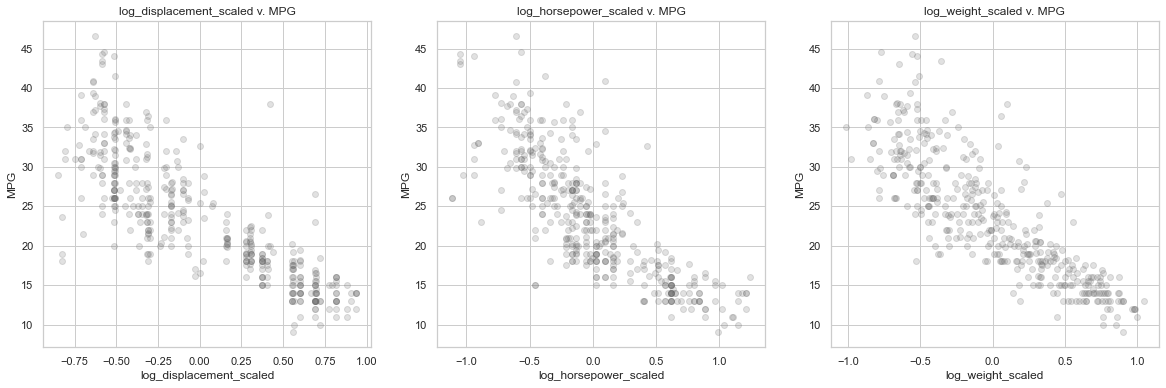

In [66]:
figure = plt.figure(figsize=(20,6))


variables = ['log_displacement_scaled','log_horsepower_scaled','log_weight_scaled']

for i, variable in enumerate( variables):
    axes = figure.add_subplot(1, 3, i + 1)

    axes.scatter(auto[variable], auto["mpg"],marker="o", color="DimGray",alpha = 0.2)
    axes.set_title( variable + " v. MPG")
    axes.set_xlabel(variable)
    axes.set_ylabel("MPG")

plt.show()
plt.close()

The log transforms have made their relationships much more linear with mpg. This means that using the log_scaled terms in the model should show an improvement

Here is the new model with the log scaled displacement, weight and horsepower

In [67]:
results_log = models.bootstrap_linear_regression("mpg ~ log_displacement_scaled + log_horsepower_scaled + log_weight_scaled + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_log))
models.adjusted_r_squared(results_log)

Model: mpg ~ log_displacement_scaled + log_horsepower_scaled + log_weight_scaled + acceleration + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_71+model_year_72+model_year_73+model_year_74+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-----------------------  ----------  -----  -------  -----
                                            95% BCI
Coefficients                         Mean   Lo       Hi
                         $\beta_0$   22.97  19.28    26.72
log_displacement_scaled  $\beta_1$   -2.75  -6.18    0.83
log_horsepower_scaled    $\beta_2$   -4.01  -6.20    -2.08
log_weight_scaled        $\beta_3$   -6.43  -8.85    -4.43
acceleration             $\beta_4$   -0.18  -0.40    -0.00
cylinder_3               $\beta_5$   -7.93  -10.63   -3.83
cylinder_5               $\beta_6$   0.82   -4.03    4.71
cylinder_6               $\beta_7$   -0.22  -1.55    1.40
cylinder_8               $\beta_8$  

0.8848342641459404

The new model shows a 0.02 improvement in the average $R^2$ and a 0.22 reduction in the average $\sigma$, showing the transforms were worthwhile.

The impact of the transforms should be visible in the residuals as well

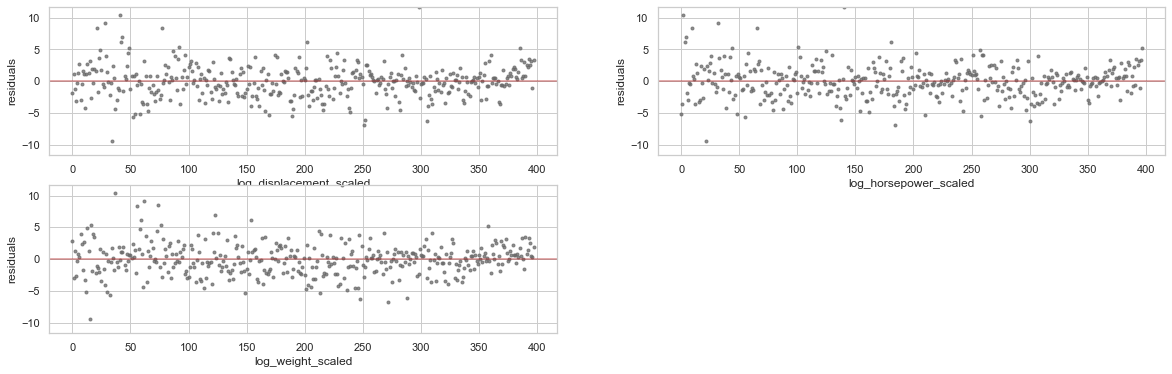

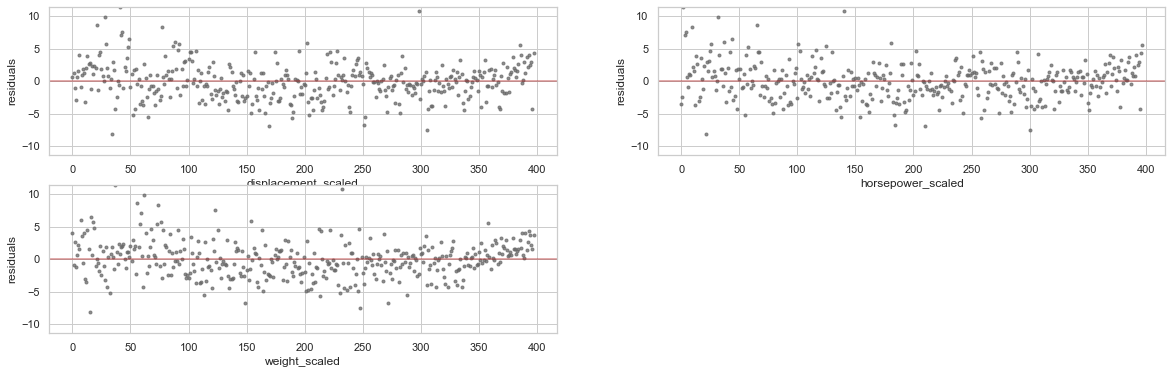

In [68]:
residuals1 = plot_residuals(results_log, ["log_displacement_scaled","log_horsepower_scaled","log_weight_scaled"])
residuals2 = plot_residuals(results_all, ["displacement_scaled","horsepower_scaled","weight_scaled"])

The displacement residuals appear more consistently linear than the original residuals. The log horsepower scaled residuals appear to exhibit some slight unequal variance with the outliers on the smaller end. The majority of the data however is consistently withn the -5 to 5 band so that will be left alone for now. Similarily, the weight residuals show an improvement, however they do appear to have unequal variance among the outliers as well. 

### 1.3.6 Model Trimming <a class="anchor" id="Trim"></a>

After all of the transformations have been performed, its now time to trim variables from the model. Lets start by analyzing the coefficient for each variable against their predictions:


In [69]:
#Linear Models Part II: Building lecture notes
def evaluate_coefficient_predictions(predictions, result):
    coefficients = result["resampled_coefficients"].columns
    for coefficient in coefficients:
        if coefficient == 'intercept':
            continue
        if predictions[coefficient] == '+':
            print("{0} P(>0)={1:.3f}".format(coefficient, np.mean(result["resampled_coefficients"][coefficient] > 0)))
        else:
            print("{0} P(<0)={1:.3f}".format(coefficient, np.mean(result["resampled_coefficients"][coefficient] < 0)))

In [70]:

predictions = {
    "log_displacement_scaled": '-',"log_horsepower_scaled": '0',"log_weight_scaled": '-',"acceleration": '+',
    "cylinder_3": '-',"cylinder_5": '-',"cylinder_6": '-',"cylinder_8": '-',"model_year_71": '-',"model_year_72": '-',
    "model_year_73": '-',"model_year_74": '-',"model_year_75": '+',"model_year_76": '+',"model_year_77": '+',
    "model_year_78": '+',"model_year_79": '+',"model_year_80": '+',"model_year_81": '+',"model_year_82": '+',
    "origin_2": '+',"origin_3": '+'}
evaluate_coefficient_predictions(predictions, results_log)

log_displacement_scaled P(<0)=0.930
log_horsepower_scaled P(<0)=1.000
log_weight_scaled P(<0)=1.000
acceleration P(>0)=0.030
cylinder_3 P(<0)=0.990
cylinder_5 P(<0)=0.300
cylinder_6 P(<0)=0.560
cylinder_8 P(<0)=0.010
model_year_71 P(<0)=0.170
model_year_72 P(<0)=0.920
model_year_73 P(<0)=0.940
model_year_74 P(<0)=0.160
model_year_75 P(>0)=0.820
model_year_76 P(>0)=0.930
model_year_77 P(>0)=1.000
model_year_78 P(>0)=1.000
model_year_79 P(>0)=1.000
model_year_80 P(>0)=1.000
model_year_81 P(>0)=1.000
model_year_82 P(>0)=1.000
origin_2 P(>0)=0.900
origin_3 P(>0)=1.000


Here is the full breakdown for every term in the model:


* **displacement** - predicted negative, actual negative, CI includes 0 - keep
* **horsepower** - predicted negative, actual negative, CI does not include 0 - keep
* **weight** - predicted negative, actual negative, CI does not include 0 - keep
* **acceleration** - predicted positive, actual negative CI includes 0 - remove
* **cylinder_3** - predicted negative, actual negative, CI includes 0 - keep
* **cylinder_5** - predicted negative, actual positve, CI includes 0 - remove
* **cylinder_6** - predicted negative, actual negative, CI does not include 0 - keep
* **cylinder_8** - predicted negative, actual positve, CI includes 0 - remove
* **model_year_71** - predicted negative, actual positve, CI includes 0 - remove
* **model_year_72** - predicted negative, actual negative, CI includes 0 - keep
* **model_year_73** - predicted negative, actual negative, CI includes 0 - keep
* **model_year_74** - predicted negative, actual positve, CI includes 0 - remove
* **model_year_75** - predicted positive, actual positive CI includes 0 - keep
* **model_year_76** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_77** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_78** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_79** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_80** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_81** - predicted positive, actual positive CI does not include 0 - keep
* **model_year_82** - predicted positive, actual positive CI does not include 0 - keep
* **origin_2** - predicted positive, actual positive CI includes 0 - keep
* **origin_3** - predicted positive, actual positive CI does not include 0 - keep

In summary 5 features need to be removed: acceleration, cylinder_5, cylinder_8, model_year_71 and model_year_74.

The new model with the suggested terms removed is as follows

In [71]:
results_trimmed = models.bootstrap_linear_regression("mpg ~ log_displacement_scaled + log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6 +model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_trimmed))
models.adjusted_r_squared(results_trimmed)

Model: mpg ~ log_displacement_scaled + log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6 +model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-----------------------  ----------  -----  -------  -----
                                            95% BCI
Coefficients                         Mean   Lo       Hi
                         $\beta_0$   21.22  20.58    21.76
log_displacement_scaled  $\beta_1$   -0.02  -2.85    2.81
log_horsepower_scaled    $\beta_2$   -2.90  -4.58    -1.41
log_weight_scaled        $\beta_3$   -7.74  -9.44    -5.98
cylinder_3               $\beta_4$   -6.80  -10.39   -1.50
cylinder_6               $\beta_5$   -1.56  -2.38    -0.81
model_year_72            $\beta_6$   -1.04  -1.82    -0.27
model_year_73            $\beta_7$   -1.18  -1.79    -0.42
model_year_75            $\beta_8$   0.28   -0.53    1.14
model_year_76            $\beta_9$   0.7

0.8833051543819014

Removing the suggested terms changed some of the coefficients average values but did not have little to no effect on the average metrics. None of the coefficient changes result in the need to remove other variables according the prior criteria

There is still the possibility that multicollinearity is increasing the width of the CI's, since log_displacement_scaled, log_horsepower_scaled and log_weight_scaled are all correlated. Since the cylinder terms account for the displacement and it has the least impact on the model of the three terms, lets try removing it to reduce the width of the coefficient CI's 

In [72]:
results_trimmed2 = models.bootstrap_linear_regression("mpg ~ log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6 +model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_trimmed2))
models.adjusted_r_squared(results_trimmed2)

Model: mpg ~ log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6 +model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
---------------------  ----------  -----  -------  -----
                                          95% BCI
Coefficients                       Mean   Lo       Hi
                       $\beta_0$   21.22  20.73    21.67
log_horsepower_scaled  $\beta_1$   -2.91  -4.29    -1.58
log_weight_scaled      $\beta_2$   -7.75  -9.04    -6.67
cylinder_3             $\beta_3$   -6.79  -9.43    -3.88
cylinder_6             $\beta_4$   -1.56  -2.19    -0.92
model_year_72          $\beta_5$   -1.04  -1.81    -0.15
model_year_73          $\beta_6$   -1.18  -1.99    -0.39
model_year_75          $\beta_7$   0.28   -0.67    1.07
model_year_76          $\beta_8$   0.78   -0.14    1.57
model_year_77          $\beta_9$   2.26   1.47     3.03
model_year_78          $\beta_10$ 

0.8836129903862984

Removing the log_displacement_scaled terms has almost no discernable impact on the model metrics.

A more detailed study of the width of the coefficient CI's is presented below. The widths are calculated for the model with and without the log displacement term and are subtracted. A negative result indicates a tighter CI bound for that coefficient. 

In [73]:
CITrimmed = results_trimmed[ "resampled_coefficients"].quantile([0.025, 0.975])
CITrimmed2 = results_trimmed2[ "resampled_coefficients"].quantile([0.025, 0.975])
CITrimmedDiff = CITrimmed.iloc[1,:] - CITrimmed.iloc[0,:]
CITrimmed2Diff = CITrimmed2.iloc[1,:] - CITrimmed2.iloc[0,:]
print(CITrimmed2Diff - CITrimmedDiff)

cylinder_3                -3.338566
cylinder_6                -0.294221
intercept                 -0.244879
log_displacement_scaled         NaN
log_horsepower_scaled     -0.457519
log_weight_scaled         -1.089706
model_year_72              0.108026
model_year_73              0.230398
model_year_75              0.065245
model_year_76              0.060906
model_year_77             -0.152111
model_year_78             -0.049401
model_year_79              0.095050
model_year_80              0.036290
model_year_81              0.260912
model_year_82             -0.076592
origin_2                  -0.816410
origin_3                  -0.360164
dtype: float64


Overall there is a net tightening in CI's, except in the model year coefficients, showing that removing the term from the model was worthwhile. 

Since the displacement term includes number of cylinders, its possible adding the other cylinder terms back into the model may improve it since that other information has been removed from the model. The model with the cylinder_5 and cylinder_8 terms is 

In [74]:
results_log = models.bootstrap_linear_regression("mpg ~  log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_log))
models.adjusted_r_squared(results_log)

Model: mpg ~  log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_5+cylinder_6+cylinder_8+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
---------------------  ----------  -----  -------  -----
                                          95% BCI
Coefficients                       Mean   Lo       Hi
                       $\beta_0$   20.69  19.91    21.56
log_horsepower_scaled  $\beta_1$   -3.17  -4.88    -1.92
log_weight_scaled      $\beta_2$   -8.35  -9.85    -7.02
cylinder_3             $\beta_3$   -6.54  -8.93    -2.23
cylinder_5             $\beta_4$   0.54   -4.73    4.99
cylinder_6             $\beta_5$   -0.95  -2.26    -0.02
cylinder_8             $\beta_6$   1.22   -0.38    2.82
model_year_72          $\beta_7$   -0.97  -1.73    -0.26
model_year_73          $\beta_8$   -1.17  -1.88    -0.39
model_year_75          $\beta_9$   0.37   -0.46    1.47
model_year_7

0.8837863923223833

Re-adding the other cylinder indicator variables did not meet the criteria and they still meet the criteria for removal from the model. 

The only other avenue of exploration could be adding in interaction terms to the model. 

### 1.3.7 Interaction Terms  <a class="anchor" id="Interaction"></a>

One possible interaction term that may reduce co-linearity in the model is correcting the displacement term for the number of cylinders in the car, so we have a measurement of the displacement per cylinder. Since cylinders are accounted for elsewhere in the model, that should reduce redundant info

In [75]:
auto['disp_per_cylinder'] = auto['displacement']/auto['cylinders']
print( "r   =", stats.pearsonr(auto["disp_per_cylinder"], auto["mpg"])[0])
auto['log_disp_per_cylinder'] = np.log(auto['disp_per_cylinder'])
mean_scale(auto,'log_disp_per_cylinder')

r   = -0.7733631022184403


The correlation of this term to mpg has decreased from -0.8 to -0.77, which does not bode well for its inclusion in the model

Nevertheless here is the model with the displacement per cylinder term

In [76]:
results_disp_per_cyl = models.bootstrap_linear_regression("mpg ~ log_disp_per_cylinder_scaled +log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_disp_per_cyl))
models.adjusted_r_squared(results_disp_per_cyl)

Model: mpg ~ log_disp_per_cylinder_scaled +log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
----------------------------  ----------  -----  -------  -----
                                                 95% BCI
Coefficients                              Mean   Lo       Hi
                              $\beta_0$   21.36  20.90    21.81
log_disp_per_cylinder_scaled  $\beta_1$   -1.28  -2.48    0.08
log_horsepower_scaled         $\beta_2$   -2.68  -3.97    -1.40
log_weight_scaled             $\beta_3$   -7.01  -8.87    -5.46
cylinder_3                    $\beta_4$   -7.03  -9.88    -4.04
cylinder_6                    $\beta_5$   -1.53  -2.12    -0.80
model_year_72                 $\beta_6$   -1.09  -1.89    -0.31
model_year_73                 $\beta_7$   -1.16  -1.86    -0.40
model_year_75                 $\beta_8$ 

0.8843971374166623

Overall the model did not change in the key metrics of $\sigma$  and $R^2$

However, the main reason for including the term was reducing multicollinearity in the model and thereby reducing the width of the CI's on the model coefficients. Shown below are the model coefficient CI width changes with the addition of the displacement per cylinder term

In [77]:
CIdisp_per_cyl = results_disp_per_cyl[ "resampled_coefficients"].quantile([0.025, 0.975])
CIdisp_per_cylDiff = CIdisp_per_cyl.iloc[1,:] - CIdisp_per_cyl.iloc[0,:]
print(CIdisp_per_cylDiff - CITrimmed2Diff )

cylinder_3                      0.292469
cylinder_6                      0.052106
intercept                      -0.022181
log_disp_per_cylinder_scaled         NaN
log_horsepower_scaled          -0.140833
log_weight_scaled               1.043588
model_year_72                  -0.079354
model_year_73                  -0.144757
model_year_75                  -0.290191
model_year_76                   0.601299
model_year_77                   0.142346
model_year_78                  -0.534240
model_year_79                   0.265140
model_year_80                  -0.724814
model_year_81                  -0.133227
model_year_82                  -0.181095
origin_2                        0.249096
origin_3                       -0.272075
dtype: float64


On balance, adding displacement per cylinder back into the model does not improve the model and increases the width of the CI for most coefficients

One other term that was removed from the model was the acceleration term. While on its own it did not add value to the model, its possible that its interaction with other terms may add some extra information that explains some of the outstanding variance in the data. Physically, the interactions between horsepower and acceleration and weight and acceleration may offer some extra insight into the unexplained variation in mpg by the model by capturing other factors which impede movement by the vehicle outside of the engine strength and the weight of the car. 

First acceleration needs to be standardized so an apples to apples comparison can be made

In [78]:
mean_scale(auto,'acceleration')

Now the model can be made. Lets test the horsepower-acceleration interactions first

In [79]:
results_inter = models.bootstrap_linear_regression("mpg ~ log_horsepower_scaled + log_horsepower_scaled:acceleration_scaled+ log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_inter))
models.adjusted_r_squared(results_inter)

Model: mpg ~ log_horsepower_scaled + log_horsepower_scaled:acceleration_scaled+ log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-----------------------------------------  ----------  -----  -------  -----
                                                              95% BCI
Coefficients                                           Mean   Lo       Hi
                                           $\beta_0$   20.78  20.21    21.44
log_horsepower_scaled                      $\beta_1$   -2.77  -3.81    -1.43
log_horsepower_scaled:acceleration_scaled  $\beta_2$   -1.56  -2.97    -0.27
log_weight_scaled                          $\beta_3$   -8.14  -9.17    -6.93
cylinder_3                                 $\beta_4$   -6.51  -9.38    -3.71
cylinder_6                                 $\beta_5$   -1.22  -1.89    -0.41
model_year_72                        

0.8865167184518851

While the term would fit the criteria to stay in the model, its inclusion does not appreciably improve the models performance and in fact decreases the adjusted $R^2$. Therefore the term will not be used.

The other potential interaction term is between weight and acceleration

In [80]:
results_inter = models.bootstrap_linear_regression("mpg ~ log_horsepower_scaled + log_weight_scaled:acceleration_scaled+ log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_inter))
models.adjusted_r_squared(results_inter)

Model: mpg ~ log_horsepower_scaled + log_weight_scaled:acceleration_scaled+ log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
-------------------------------------  ----------  -----  -------  -----
                                                          95% BCI
Coefficients                                       Mean   Lo       Hi
                                       $\beta_0$   20.73  19.95    21.28
log_horsepower_scaled                  $\beta_1$   -2.99  -4.36    -1.78
log_weight_scaled:acceleration_scaled  $\beta_2$   -2.09  -3.92    -0.33
log_weight_scaled                      $\beta_3$   -7.88  -9.12    -6.51
cylinder_3                             $\beta_4$   -6.10  -8.78    -3.06
cylinder_6                             $\beta_5$   -1.08  -1.86    -0.23
model_year_72                          $\beta_6$   -0.96  -1.84    0.08
model

0.8865436860222329

Similar to the horsepower interation term the inclusion of the weight-acceleration interaction term does not improve the model and decreases the adjusted $R^2$ of the model, therefore it will not be included.

### 1.3.8 Final Model  <a class="anchor" id="Final"></a>

The final model resulting from this build process is presented below

In [81]:
results_final = models.bootstrap_linear_regression("mpg ~ log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3", auto)
print(models.describe_bootstrap_lr(results_final))
models.adjusted_r_squared(results_final)

Model: mpg ~ log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
---------------------  ----------  -----  -------  -----
                                          95% BCI
Coefficients                       Mean   Lo       Hi
                       $\beta_0$   21.22  20.71    21.76
log_horsepower_scaled  $\beta_1$   -2.91  -4.53    -1.64
log_weight_scaled      $\beta_2$   -7.75  -9.12    -6.27
cylinder_3             $\beta_3$   -6.79  -9.65    -1.39
cylinder_6             $\beta_4$   -1.56  -2.20    -0.97
model_year_72          $\beta_5$   -1.04  -1.74    -0.17
model_year_73          $\beta_6$   -1.18  -1.86    -0.49
model_year_75          $\beta_7$   0.28   -0.66    1.09
model_year_76          $\beta_8$   0.78   -0.06    1.57
model_year_77          $\beta_9$   2.26   1.54     2.96
model_year_78          $\beta_10$  

0.8836129903862984

The final model has an average adjusted $R^2$ of 0.884 and an average $\sigma$ of 0.266

## 1.4 - Describe the model <a class="anchor" id="Describe"></a>

### 1.4.1 Model Summary <a class="anchor" id="Summary"></a>

Here is the reproduction of the final model

In [82]:
print(models.describe_bootstrap_lr(results_final))
print("adjusted $R^2$")
models.adjusted_r_squared(results_final)

Model: mpg ~ log_horsepower_scaled + log_weight_scaled + cylinder_3+cylinder_6+model_year_72+model_year_73+model_year_75+model_year_76+model_year_77+model_year_78+model_year_79+model_year_80+model_year_81+model_year_82+origin_2+origin_3
---------------------  ----------  -----  -------  -----
                                          95% BCI
Coefficients                       Mean   Lo       Hi
                       $\beta_0$   21.22  20.71    21.76
log_horsepower_scaled  $\beta_1$   -2.91  -4.53    -1.64
log_weight_scaled      $\beta_2$   -7.75  -9.12    -6.27
cylinder_3             $\beta_3$   -6.79  -9.65    -1.39
cylinder_6             $\beta_4$   -1.56  -2.20    -0.97
model_year_72          $\beta_5$   -1.04  -1.74    -0.17
model_year_73          $\beta_6$   -1.18  -1.86    -0.49
model_year_75          $\beta_7$   0.28   -0.66    1.09
model_year_76          $\beta_8$   0.78   -0.06    1.57
model_year_77          $\beta_9$   2.26   1.54     2.96
model_year_78          $\beta_10$  

0.8836129903862984

The final model contains 16 features. The average coefficient value from the bootstrapped models is used to specify the final model. Therefore, the final model is 

$MPG = 21.22 -2.91 \times logHorsepowerScaled - 7.75 \times logWeightScaled - 6.79 \times cylinder3 - 1.56 \times cylinder6 - 1.04 \times modelyear72 - 1.18 \times modelyear73 + 0.28 \times modelyear75 + 0.78 \times modelyear76 + 2.26 \times modelyear77 + 2.38 \times modelyear78 + 4.39 \times modelyear79 + 8.31 \times modelyear80 + 5.79 \times modelyear81 + 7.04 \times modelyear82 + 1.18 \times origin2 + 1.59 \times origin3$

### 1.4.2 Model Coefficients <a class="anchor" id="coeff"></a>

#### 1.4.2.1 $\beta_0$ The Intercept <a class="anchor" id="B0"></a>

The $\beta_0$ coefficient represents the intercept, which captures the base effect of the model. In this model the base vehicle is a 4-cylinder american made model year 1970 vehicle. The coefficients dropped from the model, 5 and 8 cylinders, and model years 71 and 74, are not different enough from the base effect to change the mpg so they were removed in the modeling process and are now part of the base effect. The intercept value is 21.22 with units of $\frac{miles}{gallon}$, which means the model predicts a 4-cylinder american made 1970 vehicle with average horsepower and weight would have a mpg of 21.22. The 95% credible interval for the intercept is between 20.67 and 21.78. This is a tight interval that means there is a strong likelihood the intercept is approximately 21 mpg



#### 1.4.2.2 $\beta_1$ Log Horsepower Scaled <a class="anchor" id="B1"></a>

The $\beta_1$ coefficient corresponds to the contribution of the log_horsepower_scaled feature. The log_horsepowered_scaled feature is the scaled version of log horsepower. The horsepower is scaled with a mean of 4.588927 and a standard deviation of 5.123174. The units on the feature are standard units so the coefficients units are $\frac{miles}{gallon}$ . The fact the the coefficient is negative means that an increase in horsepower decreases the mpg of the car. A car with a log horsepower 1 standard deviation above the average will see a 2.91 decrease in mpg. The 95% credible interval for the coefficients value is from -4.15 to -1.56. 


#### 1.4.2.3 $\beta_2$ Log Weight Scaled <a class="anchor" id="B2"></a>

$\beta_2$: The $\beta_2$ coefficient tracks the impact of the scaled log_weight on the cars mpg. The log weight is scaled with a mean of 7.956890 and a standard deviation of 0.280665. The units for the feature are standard units so the units for the coefficient is $\frac{miles}{gallon}$. A car with a log weight one standard deviation above the mean will decreases the mpg of the car by 7.75 mpg according to the model. The 95% credible interval for the coefficient is from -8.90 to -6.26. 

#### 1.4.2.4 $\beta_3$ 3 Cylinder <a class="anchor" id="B3"></a>

$\beta_3$: The $\beta_3$ tracks the impact of the indicator variable cylinder_3. This variable tracks the impact of 3 cylinders on mpg. Since the variable cylinder_3 is an unitless indicator variable, the units of the coefficient are $\frac{miles}{gallon}$. The coefficient states that a 3 cylinder car will have 6.79 fewer mpg than its 4 cylinder equivalent. The 95% credible interval for $\beta_3$ is from -10.02 to -3.31. This range is wider than most other coefficients. However, there were much fewer 3 cylinder vehicles than other vehicle types in the training data which will lead to increased variability.

#### 1.4.2.5 $\beta_4$ 6 Cylinder <a class="anchor" id="B4"></a>

The $\beta_4$ coefficient tracks the impact of 6 cylinders indicator variable on mpg. Since the variable cylinder_6 is an unitless indicator variable, the units of the coefficient are $\frac{miles}{gallon}$. The coefficient values means that a 6 cylinder carwith otherwise equivalent features will have 1.56 fewer mpg than its 4 cylinder equivalent. The 95% credible interval for $\beta_4$ is from -2.23 to -0.79. 

#### 1.4.2.6 $\beta_5$ Model Year 72 <a class="anchor" id="B5"></a>

The $\beta_5$ coefficient tracks the impact of the model_year_72 indicator variable on mpg. Model_year_72 represents the effect from cars with a model year of 1972. The coefficient value, which has units of $\frac{miles}{gallon}$, meansat a car made in model_year_72 will be predicted to get 1.04 fewer mpg than a model year 70 equivalent. The 95% credible interval for $\beta_5$ is from -1.92 to -0.14.


#### 1.4.2.7 $\beta_6$ Model Year 73 <a class="anchor" id="B6"></a>

The $\beta_6$ coefficient tracks the impact of the model_year_73 indicator variable on mpg. Model_year_73 represents the effect from cars with a model year of 1973 and has units of  $\frac{miles}{gallon}$.The coefficient value that a car made in model_year_75 will get 1.18 fewer mpg than a model year 70 equivalent. The 95% credible interval for $\beta_6$ is between  -2.05 and -0.36.

#### 1.4.2.8$\beta_7$ Model Year 75 <a class="anchor" id="B7"></a>

The $\beta_7$ coefficient tracks the impact of the model_year_75 indicator variable on mpg. Model_year_75 represents the effect from cars with a model year of 1975 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_75 will get 0.28 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_7$ is between -0.46 and 1.17. While the credible interval does include 0, the predicted value is positive which matches the average coefficient and domain knowledge. Once into to middle 1970's manufacturers would begin to reduce mpg in response to the 1970's oil crises.

#### 1.4.2.9 $\beta_8$ Model Year 76 <a class="anchor" id="B8"></a>

The $\beta_8$ coefficient tracks the impact of the model_year_76 indicator variable on mpg. Model_year_76 represents the effect from cars with a model year of 1976 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_76 will get 0.78 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_8$ is between -0.01 and 1.62. While the credible interval does include 0, the predicted value is positive which matches the average coefficient value and domain knowledge. Once into to middle 1970's manufacturers would begin to reduce mpg in response to the 1970's oil crises.

#### 1.4.2.10 $\beta_9$ Model Year 77 <a class="anchor" id="B9"></a>

The $\beta_9$ coefficient tracks the impact of the model_year_77 indicator variable on mpg.  Model_year_77 represents the effect from cars with a model year of 1977 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_77 will get 2.26 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_9$ is from 1.34 tp 3.11 mpg.

#### 1.4.2.11 $\beta_{10}$ Model Year 78 <a class="anchor" id="B10"></a>

The $\beta_{10}$ coefficient tracks the impact of the model_year_78 indicator variable on mpg. Model_year_78 represents the effect from cars with a model year of 1978 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_78 will get 2.38 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_{10}$ is from 1.34 to 3.65.

#### 1.4.2.12 $\beta_{11}$ Model Year 79 <a class="anchor" id="B11"></a>

The $\beta_{11}$ coefficient tracks the impact of the model_year_79 indicator variable on mpg. Model_year_79 represents the effect from cars with a model year of 1979 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_79 will get 4.39 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_{11}$ is from 3.31   to 5.52.

#### 1.4.2.13 $\beta_{12}$ Model Year 80 <a class="anchor" id="B12"></a>

The $\beta_{12}$ coefficient tracks the impact of the model_year_80 indicator variable on mpg. Model_year_80 represents the effect from cars with a model year of 1980 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model year 80 will get 8.31 more mpg than a model year 70 equivalent.  The 95% credible interval for $\beta_{12}$ is from   6.52 to 10.10.

#### 1.4.2.14 $\beta_{13}$ Model Year 81 <a class="anchor" id="B13"></a>

The $\beta_{13}$ coefficient tracks the impact of the model_year_81 indicator variable on mpg.  Model_year_81 represents the effect from cars with a model year of 1981 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model year 81 will get 5.79 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_{13}$ is from 4.86 to 7.00.

#### 1.4.2.15 $\beta_{14}$ Model Year 82 <a class="anchor" id="B14"></a>

The $\beta_{14}$ coefficient tracks the impact of the model_year_82 indicator variable on mpg. Model_year_82 represents the effect from cars with a model year of 1982 and has units of  $\frac{miles}{gallon}$. The coefficient states that a car made in model_year_82 will get 7.04 more mpg than a model year 70 equivalent. The 95% credible interval for $\beta_{14}$ is from 5.81 to 8.27 mpg.

#### 1.4.2.16 $\beta_{15}$ Origin 2 <a class="anchor" id="B15"></a>

The $\beta_{15}$ coefficient represents the impact of the origin_2 indicator variable on the model. origin_2 refers to cars manufactured in Europe Since origin_2 is a unitless indicator variable, the units for coefficient $\beta_15$ are $\frac{miles}{gallon}$. The coefficients value means that a car manufactured in Europe can be expected to get 1.18 mpg than a car with similar characteristics from america. The 95% credible interval for $\beta_{15} $ is from 0.32 to 2.07 mpg.

#### 1.4.2.17 $\beta_{16}$ Origin 3 <a class="anchor" id="B16"></a>

The $\beta_{16}$ coefficient represents the impact of the origin_3 indicator variable on the model. origin_3 refers to cars manufactured in Asia. Since origin_3 is a unitless indicator variable, the units for coefficient $\beta_16$ are $\frac{miles}{gallon}$. The coefficients value means that a car manufactured in Asiacan be expected to get 1.59 mpg than a car with similar characteristics from America. The 95% credible interval for $\beta_{16}$ is from 0.84 to 2.43 mpg.

### 1.4.3 Metrics <a class="anchor" id="Metrics"></a>

There are 3 metrics that have been used to evaluate this linear regression model, $\sigma$, $R^2$ and Adjusted $R^2$. Each of the three is discussed below

#### 1.4.3.1 $\sigma$  <a class="anchor" id="Sigma"></a>

 $\sigma$ measures the standard deviation of the predictions made by the model on the training datao or the standard error of the model. This model has an average standard deviation of 2.66, with a 95% Credible interval of standard deviation between 2.35 and 2.86 mpg. This indicates that the model deviates from the true mpg value by 2.66 mpg on average. 

#### 1.4.3.2 $R^2$  <a class="anchor" id="R2"></a>

The average $R^2$ value for this model is 0.89 with a 95% credible interval of 0.87-0.91. This means that the model explains 89% of the variation of mpg present in the data, which is a very good result. The credible interval indicates that all versions of the model succeed at explaining a similar level of variance in the data giving confidence that the model is accurate for close to 90% of the variation in mpg in the training data.

#### 1.4.3.3 Adjusted $R^2$  <a class="anchor" id="R2adj"></a>

The $R^2$ value is a value that will never decrease with the addition of another coefficient. Therefore, it can be useful to look at the adjusted $R^2$ values to determine whether or not adding more coefficients has actually improved how much of the error is explained by the model. The adjusted $R^2$ is 0.884, which tracks very closely with the $R^2$ value, indicating the number of coefficients in the model is not inflating the $R^2$ value artificially

## 1.4.4 Model Takeaways<a class="anchor" id="Takeaways"></a>

One of the nice things about this model is that all of the coefficients share the same units as all of the numerical variables are scaled and all of the other variables are indicator variables. This allows us to study they model directly and learn about trends in mpg of automobiles with model years from 1970-1982. Several takewaways present themselves by analyzing the model:

* Not considering the model year, the weight of the car has the largest impact on the the mpg and heavier cars have a large negative impact on mpg
* Car manufacturers from model year 77 onwards make significant strides in increasing the mpg of their vehicles in addition to weight and horsepower changes tracked by this model. They were able to respond to the oil crises with models that achieved greater fuel efficiency.
* On average, 3 and 6 cylinder vehicles from this era are less fuel efficient than their peers with a four or eight cylinder engine.
* Vehicles manufactured outside of America with similiar characteristcs get approximately 1 extra mpg than their american counterparts. 

## 1.5 - Use the model <a class="anchor" id="Use"></a>

The final model will be used to predict one of the values from the data set, selected as random.

In [83]:
np.random.seed([19129])

The index was randomly generated as 363 and has been fixed now for reproducibility

In [84]:
#index = np.random.uniform(1, auto.shape[0], 1)
index = [306]
print(tabulate(auto.iloc[index,0:8],headers = auto.columns[0:8]))
print(tabulate(auto.iloc[index,8:15],headers = auto.columns[8:15]))
print(tabulate(auto.iloc[index,15:22],headers = auto.columns[15:22]))
print(tabulate(auto.iloc[index,22:28],headers = auto.columns[22:28]))
print(tabulate(auto.iloc[index,28:34],headers = auto.columns[28:34]))
print(tabulate(auto.iloc[index,34:39],headers = auto.columns[34:39]))
print(tabulate(auto.iloc[index,39:45],headers = auto.columns[39:45]))

       mpg    cylinders    displacement    horsepower    weight    acceleration    model year    origin
---  -----  -----------  --------------  ------------  --------  --------------  ------------  --------
306   28.8            6             173           115      2595            11.3            79         1
     car name                cylinder_3    cylinder_4    cylinder_5    cylinder_6    cylinder_8    model_year_70
---  --------------------  ------------  ------------  ------------  ------------  ------------  ---------------
306  "chevrolet citation"             0             0             0             1             0                0
       model_year_71    model_year_72    model_year_73    model_year_74    model_year_75    model_year_76    model_year_77
---  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------
306                0                0                0                0                0               

These values provide the inputs for the prediction of the result from the model which is done below


In [85]:
results_final["model"].predict(np.array([[1,0.228834,-0.170218,0,1,0,0,0,0,0,0,1,0,0 ,0 ,0,0]]))[0][0]

24.702880364453634

The model predicts that this vehicle will have an mpg of 24.70 $\frac{miles}{gallon}$, when the true mpg is 28.8 $\frac{miles}{gallon}$. This is a 4.1 mpg difference, larger than expected considering the standard deviation for the model is only 2.66

However, the models allow us to construct a credible interval for that prediction. This is done below, using code from the lecture notes Linear models Part II: Building

In [86]:
def bootstrap_prediction(result, feature_values):
    # resampled_coefficients is a DataFrame in result.
    # each *row* is a different bootstrap model.
    # we use a Dict instead of Vector because the order may not be preserved.
    # we should modify this to use the model to pick the values and possibly
    # convert interactions terms.
    results = []
    for coefficients in result["resampled_coefficients"].itertuples():
        estimate = 0
        for feature in feature_values.keys():
            estimate += feature_values[feature] * getattr(coefficients, feature)
        results.append(estimate)
    return np.array(results)

In [87]:
feature_values = {"intercept": 1, "log_horsepower_scaled": 0.228834, "log_weight_scaled": -0.170218, "cylinder_3": 0,
                 "cylinder_6": 1, "model_year_72": 0, "model_year_73": 0, "model_year_75": 0,"model_year_76": 0,
                 "model_year_77": 0, "model_year_78": 0, "model_year_79": 1, "model_year_80": 0, "model_year_81": 0,
                 "model_year_82": 0, "origin_2": 0, "origin_3": 0,}
posterior_prediction_chevy = bootstrap_prediction(results_final, feature_values)
posterior_prediction_chevy.mean()

24.620708138277887

The mean mpg prediction for this car is only slightly higher than the single sample at 24.77 mpg.

Since this has been bootstrapped, the distribution of all predicted values for this vechile can be visualized

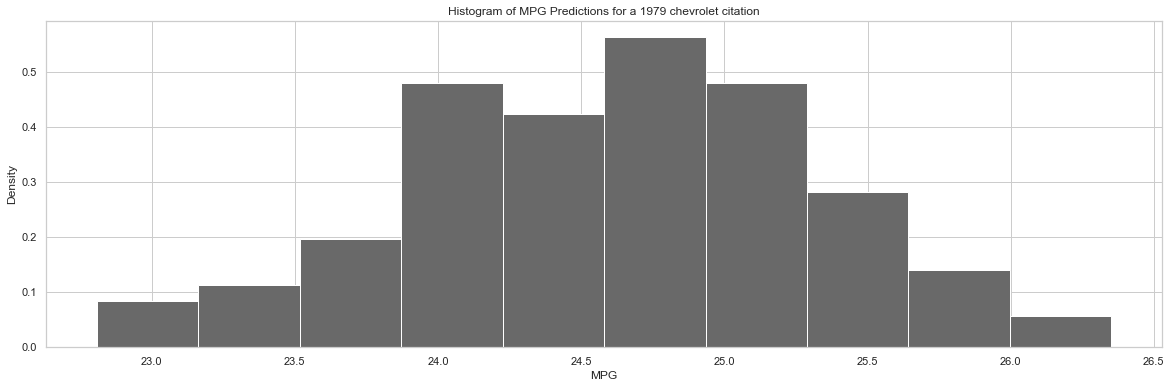

In [88]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(posterior_prediction_chevy, color="DimGray", density=True)
axes.set_xlabel( "MPG")
axes.set_ylabel( "Density")
axes.set_title("Histogram of MPG Predictions for a 1979 chevrolet citation")

plt.show()
plt.close()

Visuallly it can be observed that the true mpg value is not covered in the distribution. The model is not a good fit for predicting this vehicles mpg.

The 95% credible interval for the models prediction of the mpg of the 1979 chevrolet citation is shown below 

In [89]:
print(stats.mstats.mquantiles( posterior_prediction_chevy, [0.025, 0.975]))

[23.13632567 26.02075409]


The 95% bayesian credible interval for the prediction from this model on the target car is 23.30 to 25.78 mpg.



---

**CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.



*   Have you completed every section and answered every question asked?
*   For every question, have you described your approach and explained your results?
*   Have you checked for spelling and grammar errors?
*   Are your code blocks free of any errors?
*   Have you *SAVED* your notebook?

